In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [9]:
'''
Read through 108 excel files using glob module. Make sure the files are ordered according to condition and residence time.
'''


file_list = glob.glob(r'*.xlsx')
# Go to directory and return a list of all the file names in that location.

file_list = sorted(file_list, key=os.path.getmtime)
# Sort files according to the time that it was created.

file_list.remove(file_list[107])
file_list.insert(0 ,'C1 T30.xlsx')     
file_list.remove(file_list[88])
file_list.insert(84 ,'C22 T30.xlsx')
# Rearrange the order of the files which were created out of order in time, to be ordered by file name.

indices = [x for x in range(len(file_list))]
d = dict(zip(indices, file_list))
d
# Inspect the order of the file_list. Indices coupled with file name.

{0: 'C1 T30.xlsx',
 1: 'C1 T60.xlsx',
 2: 'C1 T90.xlsx',
 3: 'C1 T120.xlsx',
 4: 'C2 T30.xlsx',
 5: 'C2 T60.xlsx',
 6: 'C2 T90.xlsx',
 7: 'C2 T120.xlsx',
 8: 'C3 T30.xlsx',
 9: 'C3 T60.xlsx',
 10: 'C3 T90.xlsx',
 11: 'C3 T120.xlsx',
 12: 'C4 T30.xlsx',
 13: 'C4 T60.xlsx',
 14: 'C4 T90.xlsx',
 15: 'C4 T120.xlsx',
 16: 'C5 T30.xlsx',
 17: 'C5 T60.xlsx',
 18: 'C5 T90.xlsx',
 19: 'C5 T120.xlsx',
 20: 'C6 T30.xlsx',
 21: 'C6 T60.xlsx',
 22: 'C6 T90.xlsx',
 23: 'C6 T120.xlsx',
 24: 'C7 T30.xlsx',
 25: 'C7 T60.xlsx',
 26: 'C7 T90.xlsx',
 27: 'C7 T120.xlsx',
 28: 'C8 T30.xlsx',
 29: 'C8 T60.xlsx',
 30: 'C8 T90.xlsx',
 31: 'C8 T120.xlsx',
 32: 'C9 T30.xlsx',
 33: 'C9 T60.xlsx',
 34: 'C9 T90.xlsx',
 35: 'C9 T120.xlsx',
 36: 'C10 T30.xlsx',
 37: 'C10 T60.xlsx',
 38: 'C10 T90.xlsx',
 39: 'C10 T120.xlsx',
 40: 'C11 T30.xlsx',
 41: 'C11 T60.xlsx',
 42: 'C11 T90.xlsx',
 43: 'C11 T120.xlsx',
 44: 'C12 T30.xlsx',
 45: 'C12 T60.xlsx',
 46: 'C12 T90.xlsx',
 47: 'C12 T120.xlsx',
 48: 'C13 T30.xlsx',
 49: 

In [10]:
df = pd.read_excel(file_list[0]) # Read 1st file

df # DataFrame needs cleaning to extract MW and Mole Fraction data

Data File  \
0            Sample ID   
1     Method File Name   
2        Date Acquired   
3              Solvent   
4             Operator   
...                ...   
7534           24.9833   
7535           24.9867   
7536             24.99   
7537           24.9933   
7538           24.9967   

     C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\1. Data - Consolidated\GPC - Consolidated\Consolidated Raw GPC Chromatograms and Method Files\C1 T30.vdt  \
0                                       C1R3 T30 Repeat                                                                                                                      
1                                  TJD_Mar2021-0000.vcm                                                                                                                      
2                               Feb 23, 2021 - 17:12:28                                                                                                                      
3                                                   THF                                                                                                                      
4                                 admin : Administrator                                                                                                                      
...                                                 ...                                                                                                                      
7534                                             -2.655                                                                                                                      
7535                                              -2.67                                                                                                                      
7536                                              -2.67                                                                                                                      
7537                                             -2.701                                                                                                                      
7538                                             -2.686                                                                                                                      

     Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0           NaN        NaN        NaN        NaN        NaN        NaN   
1           NaN        NaN        NaN        NaN        NaN        NaN   
2           NaN        NaN        NaN        NaN        NaN        NaN   
3           NaN        NaN        NaN        NaN        NaN        NaN   
4           NaN        NaN        NaN        NaN        NaN        NaN   
...         ...        ...        ...        ...        ...        ...   
7534      22.05     88.809   -2500.08     33.198        NaN        NaN   
7535      22.05     88.809   -2500.08    33.1986        NaN        NaN   
7536      22.05     88.794   -2500.08    33.1986        NaN        NaN   
7537      22.05     88.763   -2500.08    33.1986        NaN        NaN   
7538      22.05     88.748   -2500.08     33.198        NaN        NaN   

     Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13  \
0           NaN        NaN         NaN         NaN         NaN         NaN   
1           NaN        NaN         NaN         NaN         NaN         NaN   
2           NaN        NaN         NaN         NaN         NaN         NaN   
3           NaN        NaN         NaN         NaN         NaN         NaN   
4           NaN        NaN         NaN         NaN         NaN         NaN   
...         ...        ...         ...         ...         ...         ...   
7534        NaN        NaN         NaN         NaN         NaN         NaN   
7535        NaN        NaN         NaN         NaN         NaN         NaN   
7536        NaN     

In [11]:
x = list(df.iloc[:,11].dropna()) # Drop all empty values
x = x[1:] # Drop 1st element 'Molecular Weight' of list

M_i = [] # Create a list of absolute molecular weights by taking inverse log of x.values
for i in x:
    i = 10**i
    M_i.append(i)


n_i = list(df.iloc[:,14].dropna()) # Drop all empty values
n_i = n_i[1:] # Drop 1st element 'Normalized Mole Fraction' of list. n_i list represents the Normalized Mole Fraction.

'''
Create the scaffold of a DataFrame so that each file can be iteratively read and then appended in rows.
The DataFrame will contain the absolute molecular weights as its header, and the values of n_i in each file as its values.
The length of each row is fixed to 1499 values, owing to the boundary set during data extraction using OmniSEC.
Each row will represent an MWD when plotted against the header.
'''

df = dict(zip(M_i,n_i)) # zip the M_i and n_i lists together and create a dictionary
df = pd.DataFrame(df, index=[0]) # Create a Dataframe from the dictionary and set index to absolute MW.
df # Inspect df. Header must be the absolute molecular weight, each row represents the n_i value of each file at that MW.

321366.053864  323817.264731  321736.253270  319742.230320  317760.565716  \
0              0              0              0              0              0   

   315718.477627  313761.751012  311817.151590  309884.604201  307893.130974  \
0              0              0              0              0              0   

   ...  538.145856     536.537400     535.056938     533.457715     \
0  ...         0.0342         0.0309         0.0314         0.0287   

   531.863271     530.395707     528.810415     527.229861     525.775082     \
0         0.0273         0.0271         0.0263         0.0248         0.0253   

   521.674970     
0         0.0246  

[1 rows x 1499 columns]

In [12]:
for i in range(len(file_list)): # i ranges from 0 to 107 (108 MWD files)
    df1 = pd.read_excel(file_list[i]) # Dummy df1 object stores the unedited excel file DataFrame within the loop
    n_i = list(df1.iloc[:,14].dropna()) # Drop missing values and create a list
    n_i = n_i[1:] # Drop 'Normalized Mole Fraction'
    df.loc[i] = n_i # Overwrite the ith row of df with n_i

df

321366.053864  323817.264731  321736.253270  319742.230320  \
0              0.0            0.0            0.0            0.0   
1              0.0            0.0            0.0            0.0   
2              0.0            0.0            0.0            0.0   
3              0.0            0.0            0.0            0.0   
4              0.0            0.0            0.0            0.0   
..             ...            ...            ...            ...   
103            0.0            0.0            0.0            0.0   
104            0.0            0.0            0.0            0.0   
105            0.0            0.0            0.0            0.0   
106            0.0            0.0            0.0            0.0   
107            0.0            0.0            0.0            0.0   

     317760.565716  315718.477627  313761.751012  311817.151590  \
0              0.0            0.0            0.0            0.0   
1              0.0            0.0            0.0            0.0   
2              0.0            0.0            0.0            0.0   
3              0.0            0.0            0.0            0.0   
4              0.0            0.0            0.0            0.0   
..             ...            ...            ...            ...   
103            0.0            0.0            0.0            0.0   
104            0.0            0.0            0.0            0.0   
105            0.0            0.0            0.0            0.0   
106            0.0            0.0            0.0            0.0   
107            0.0            0.0            0.0            0.0   

     309884.604201  307893.130974  ...  538.145856     536.537400     \
0              0.0            0.0  ...         0.0342         0.0309   
1              0.0            0.0  ...         0.0863         0.0860   
2              0.0            0.0  ...         0.0822         0.0816   
3              0.0            0.0  ...         0.0975         0.0967   
4              0.0            0.0  ...         0.1053         0.1038   
..             ...            ...  ...            ...            ...   
103            0.0            0.0  ...         0.0406         0.0440   
104            0.0            0.0  ...         0.0464         0.0464   
105            0.0            0.0  ...         0.0456         0.0457   
106            0.0            0.0  ...         0.0514         0.0502   
107            0.0            0.0  ...         0.0600         0.0620   

     535.056938     533.457715     531.863271     530.395707     \
0           0.0314         0.0287         0.0273         0.0271   
1           0.0865         0.0862         0.0867         0.0860   
2           0.0810         0.0797         0.0788         0.0792   
3           0.0955         0.0940         0.0932         0.0916   
4           0.1031         0.1025         0.1036         0.1039   
..             ...            ...            ...            ...   
103         0.0474         0.0440         0.0492         0.0475   
104         0.0419         0.0419         0.0430         0.0419   
105         0.0457         0.0490         0.0468         0.0458   
106         0.0453         0.0453         0.0429         0.0429   
107         0.0580         0.0501         0.0501         0.0500   

     528.810415     527.229861     525.775082     521.674970     
0           0.0263         0.0248         0.0253         0.0246  
1           0.0856         0.0848         0.0849         0.0846  
2           0.0783         0.0783         0.0787         0.0785  
3           0.0917         0.0901         0.0905         0.0901  
4           0.1023         0.1025         0.1019         0.1017  
..             ...            ...            ...            ...  
103         0.0459         0.0459         0.0459         0.0427  
104         0.0419         0.0442         0.0443         0.0457  
105         0.0469         0.0480         0.0469         0.0483  
106         0.0454         0.0478         0.0454         0.0493  

In [13]:
'''
Re-index the rows of df into the corresponding condition and residence time for book-keeping purposes.
'''

index =[]
for i in file_list:
    i = i.replace('.xlsx','') # Replace substring '.xlsx' with ''
    index.append(i) 

df.index = index
df

321366.053864  323817.264731  321736.253270  319742.230320  \
C1 T30              0.0            0.0            0.0            0.0   
C1 T60              0.0            0.0            0.0            0.0   
C1 T90              0.0            0.0            0.0            0.0   
C1 T120             0.0            0.0            0.0            0.0   
C2 T30              0.0            0.0            0.0            0.0   
...                 ...            ...            ...            ...   
C26 T120            0.0            0.0            0.0            0.0   
C27 T30             0.0            0.0            0.0            0.0   
C27 T60             0.0            0.0            0.0            0.0   
C27 T90             0.0            0.0            0.0            0.0   
C27 T120            0.0            0.0            0.0            0.0   

          317760.565716  315718.477627  313761.751012  311817.151590  \
C1 T30              0.0            0.0            0.0            0.0   
C1 T60              0.0            0.0            0.0            0.0   
C1 T90              0.0            0.0            0.0            0.0   
C1 T120             0.0            0.0            0.0            0.0   
C2 T30              0.0            0.0            0.0            0.0   
...                 ...            ...            ...            ...   
C26 T120            0.0            0.0            0.0            0.0   
C27 T30             0.0            0.0            0.0            0.0   
C27 T60             0.0            0.0            0.0            0.0   
C27 T90             0.0            0.0            0.0            0.0   
C27 T120            0.0            0.0            0.0            0.0   

          309884.604201  307893.130974  ...  538.145856     536.537400     \
C1 T30              0.0            0.0  ...         0.0342         0.0309   
C1 T60              0.0            0.0  ...         0.0863         0.0860   
C1 T90              0.0            0.0  ...         0.0822         0.0816   
C1 T120             0.0            0.0  ...         0.0975         0.0967   
C2 T30              0.0            0.0  ...         0.1053         0.1038   
...                 ...            ...  ...            ...            ...   
C26 T120            0.0            0.0  ...         0.0406         0.0440   
C27 T30             0.0            0.0  ...         0.0464         0.0464   
C27 T60             0.0            0.0  ...         0.0456         0.0457   
C27 T90             0.0            0.0  ...         0.0514         0.0502   
C27 T120            0.0            0.0  ...         0.0600         0.0620   

          535.056938     533.457715     531.863271     530.395707     \
C1 T30           0.0314         0.0287         0.0273         0.0271   
C1 T60           0.0865         0.0862         0.0867         0.0860   
C1 T90           0.0810         0.0797         0.0788         0.0792   
C1 T120          0.0955         0.0940         0.0932         0.0916   
C2 T30           0.1031         0.1025         0.1036         0.1039   
...                 ...            ...            ...            ...   
C26 T120         0.0474         0.0440         0.0492         0.0475   
C27 T30          0.0419         0.0419         0.0430         0.0419   
C27 T60          0.0457         0.0490         0.0468         0.0458   
C27 T90          0.0453         0.0453         0.0429         0.0429   
C27 T120         0.0580         0.0501         0.0501         0.0500   

          528.810415     527.229861     525.775082     521.674970     
C1 T30           0.0263         0.0248         0.0253         0.0246  
C1 T60           0.0856         0.0848         0.0849         0.0846  
C1 T90           0.0783         0.0783         0.0787         0.0785  
C1 T120          0.0917         0.0901         0.0905         0.0901  
C2 T30           0.1023         0.1025         0.1019         0.1017  
...                 ...            ...            ...           

<ipython-input-14-2244752fe76b>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (20,500))


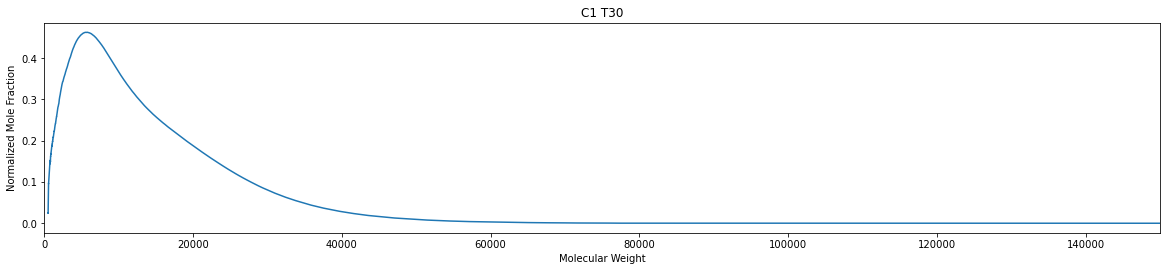

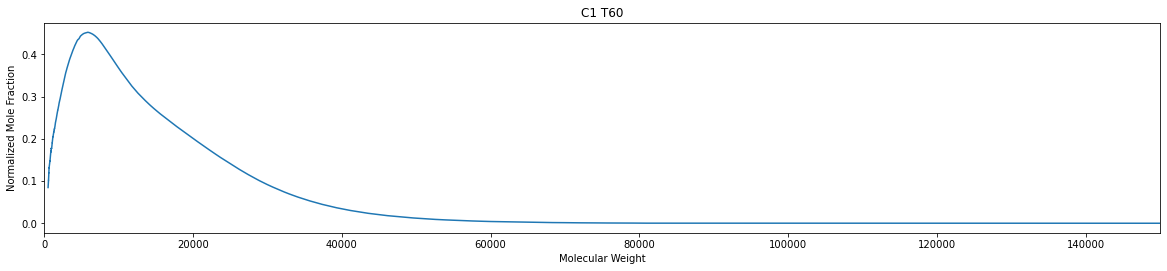

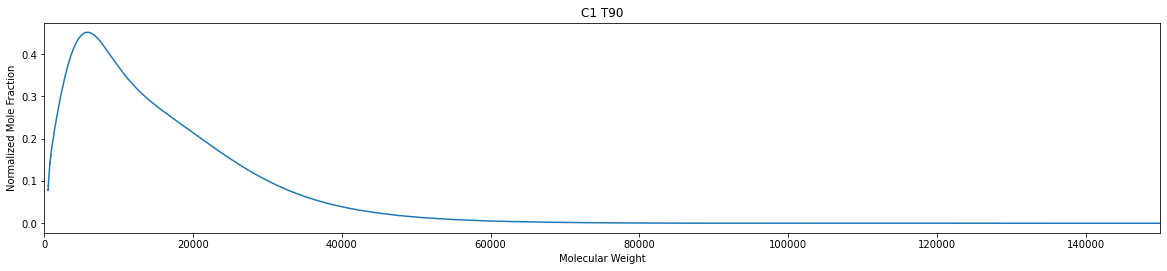

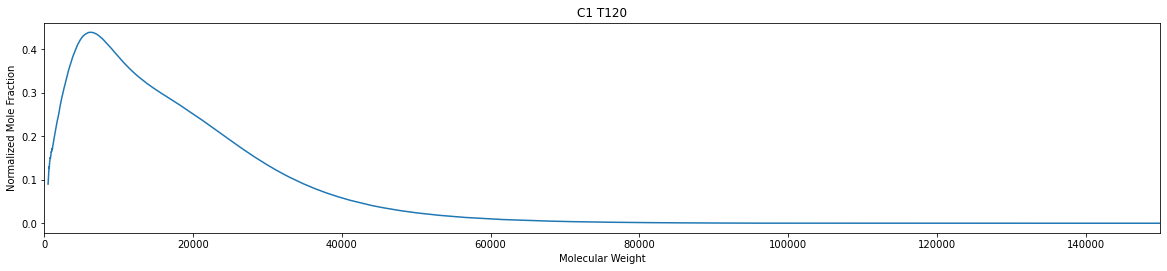

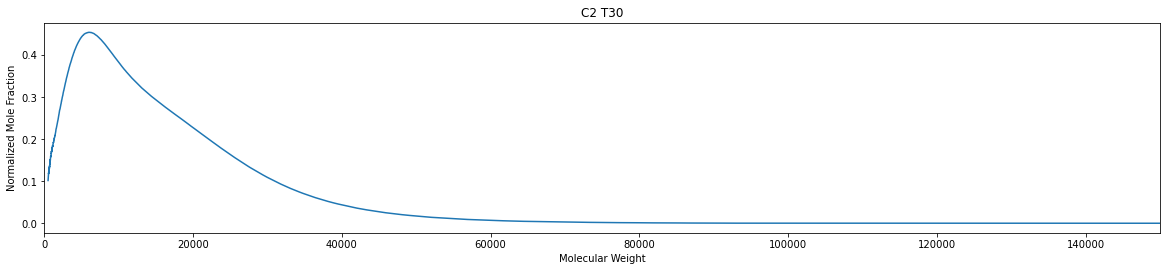

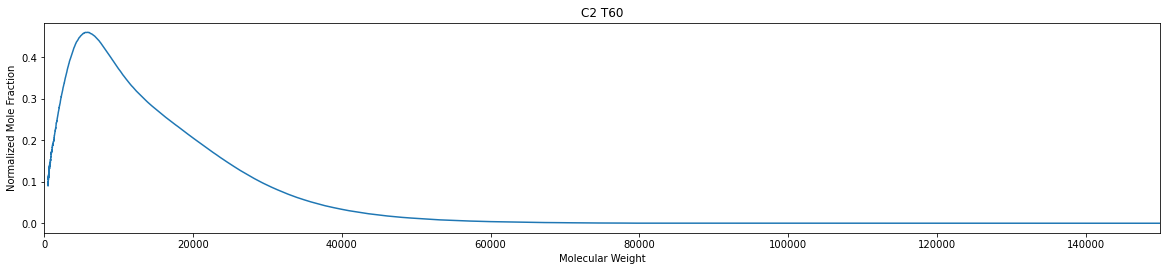

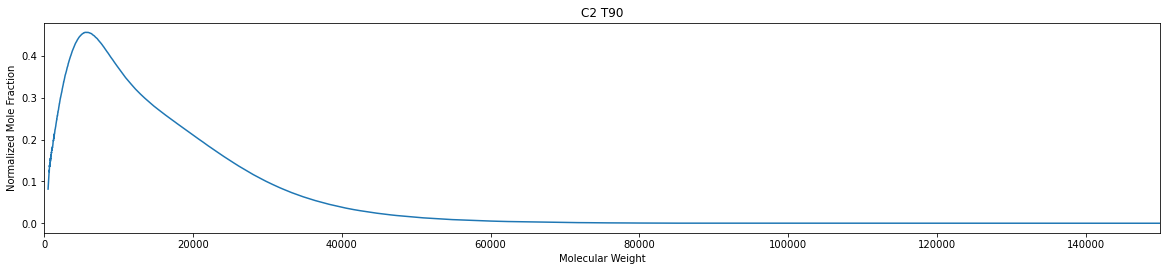

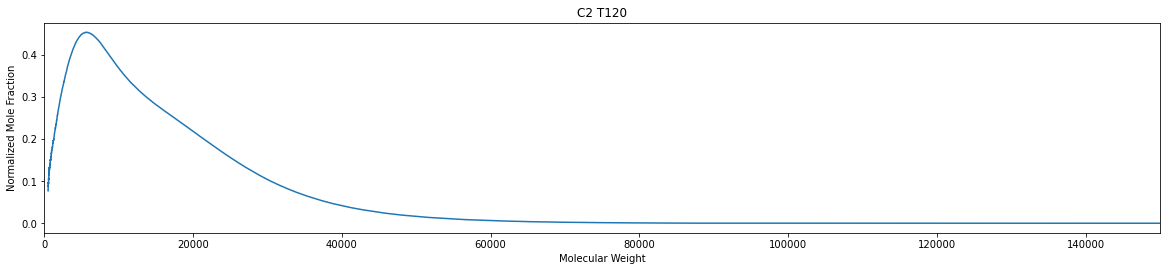

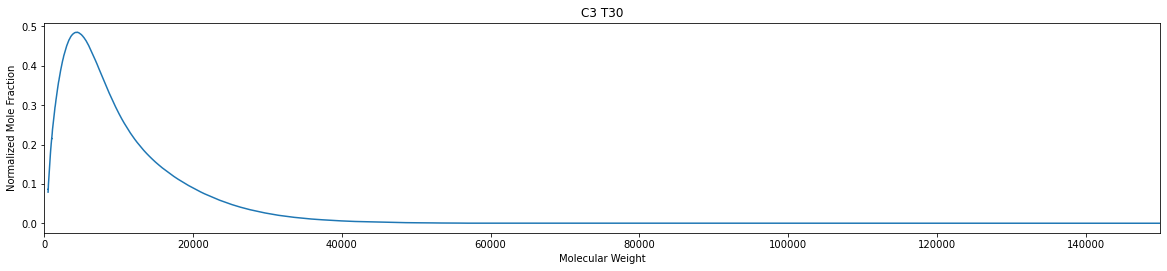

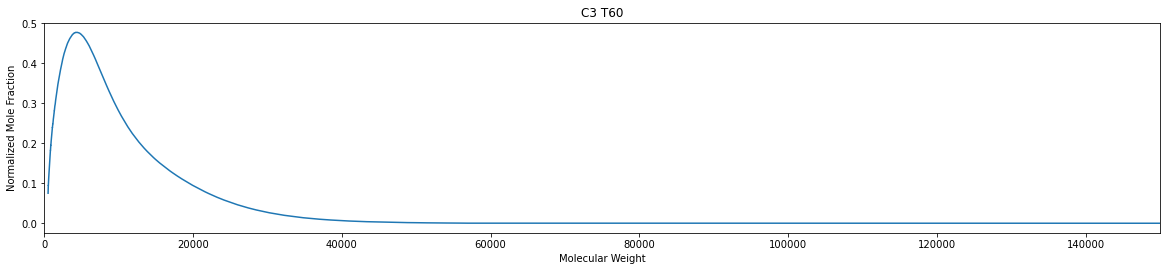

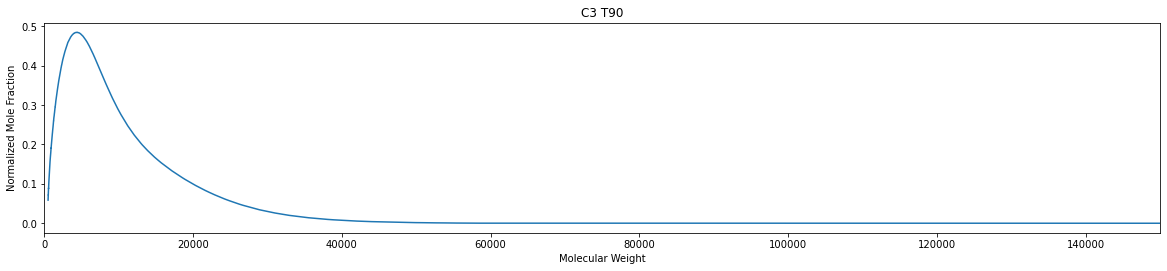

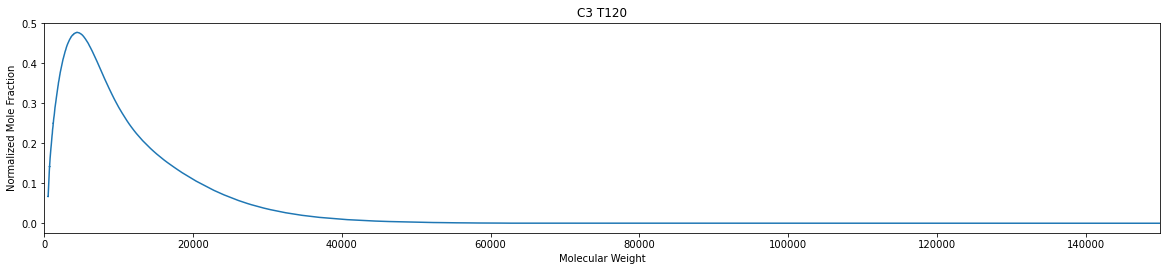

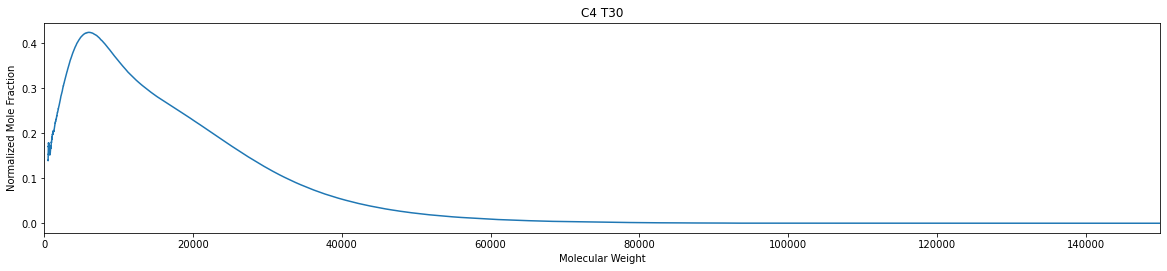

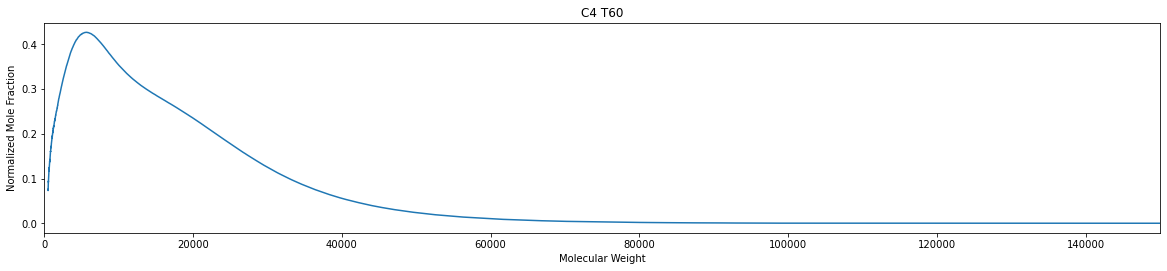

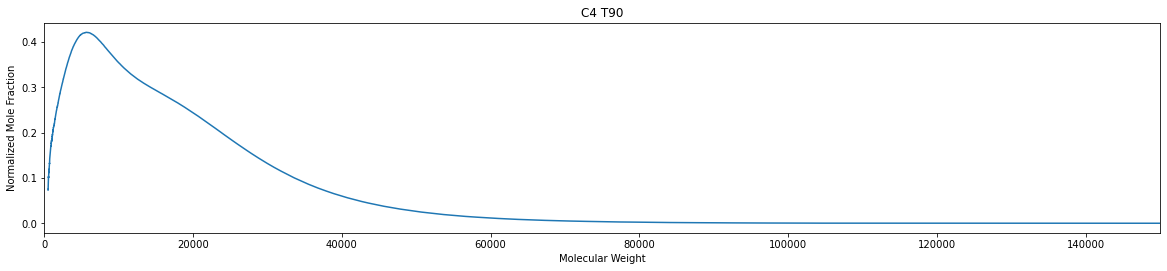

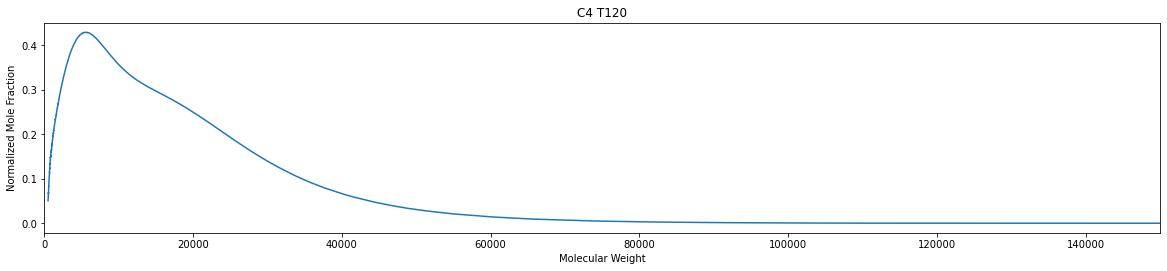

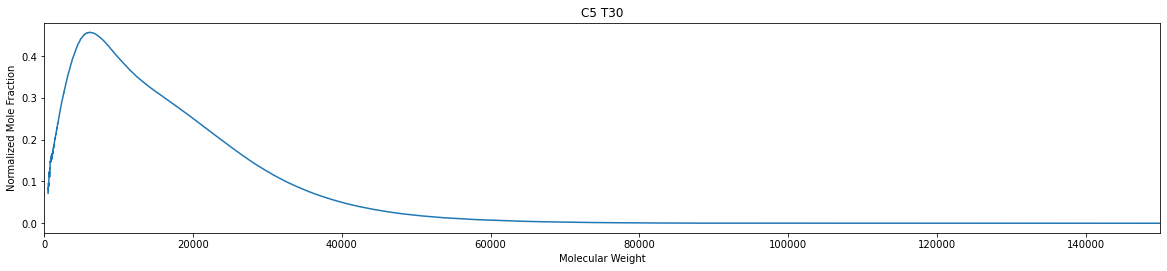

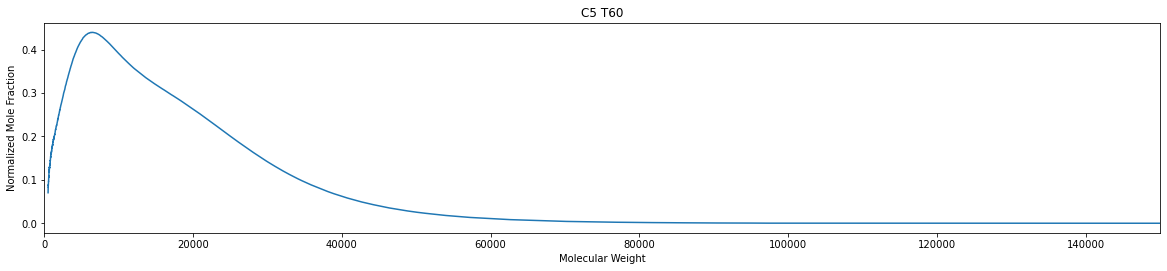

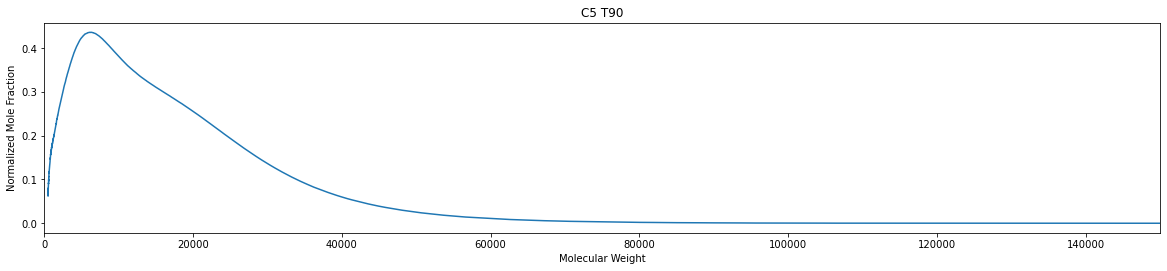

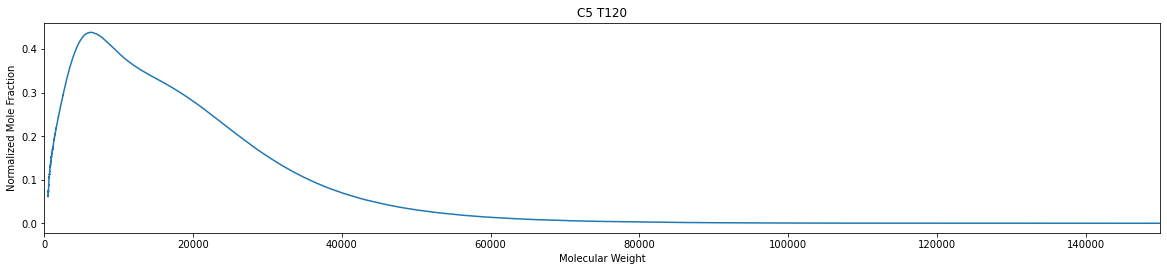

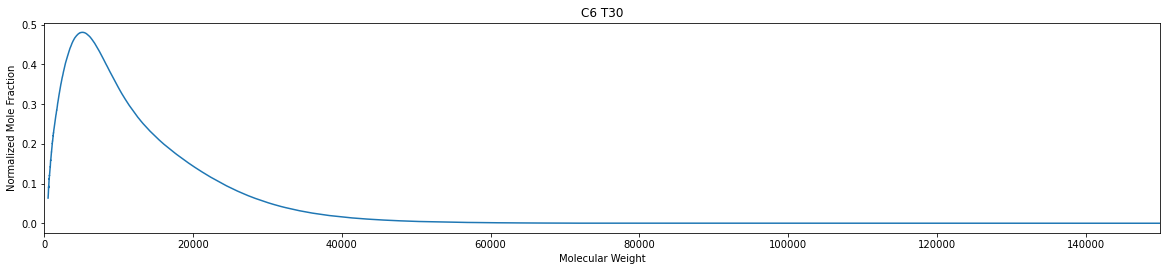

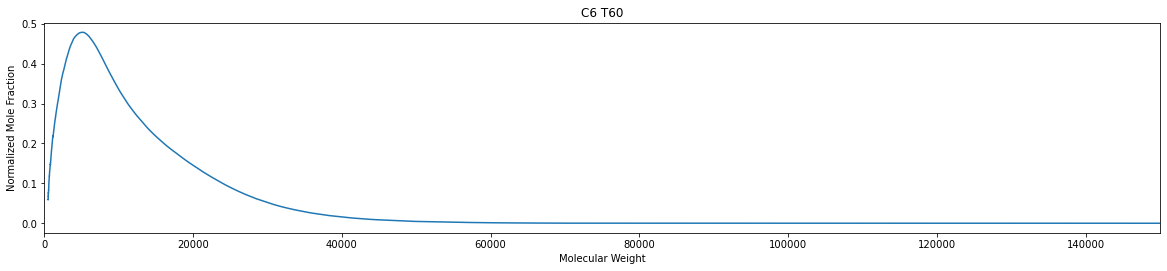

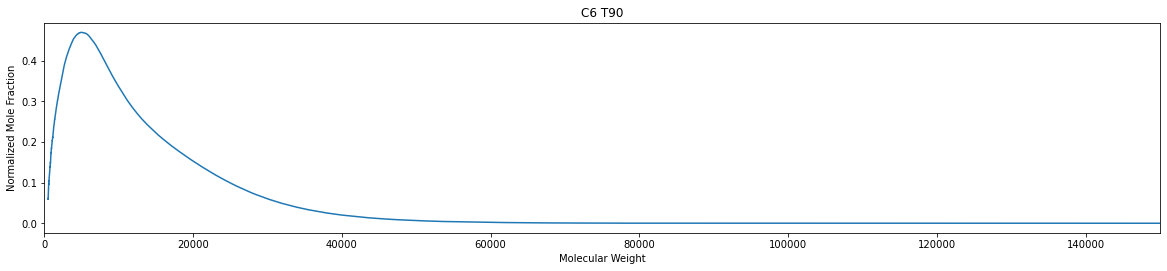

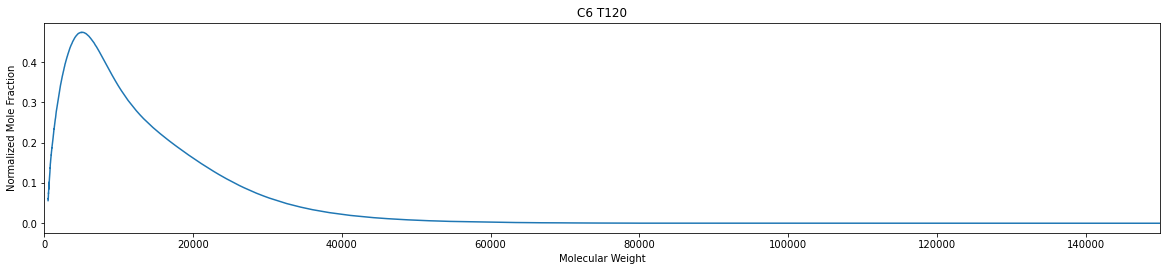

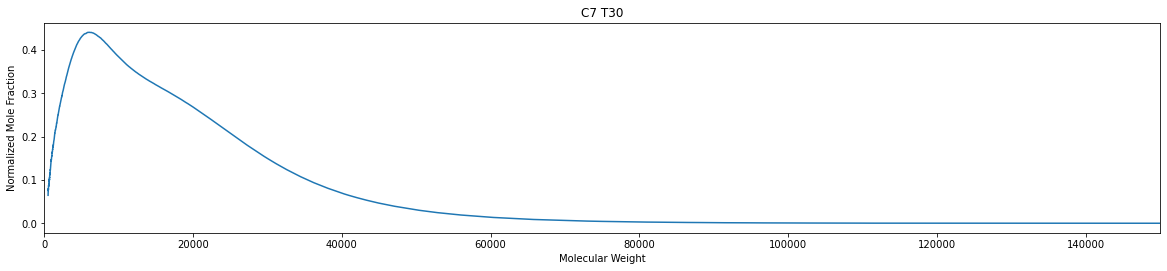

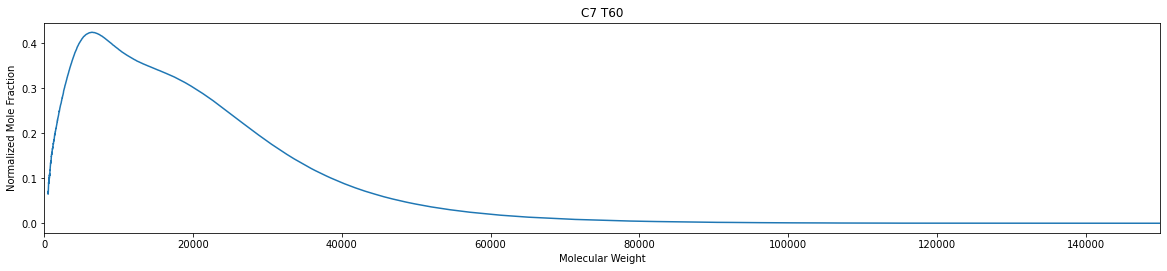

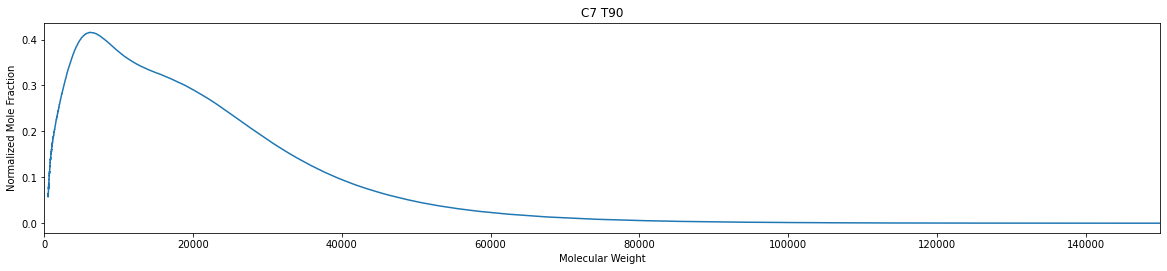

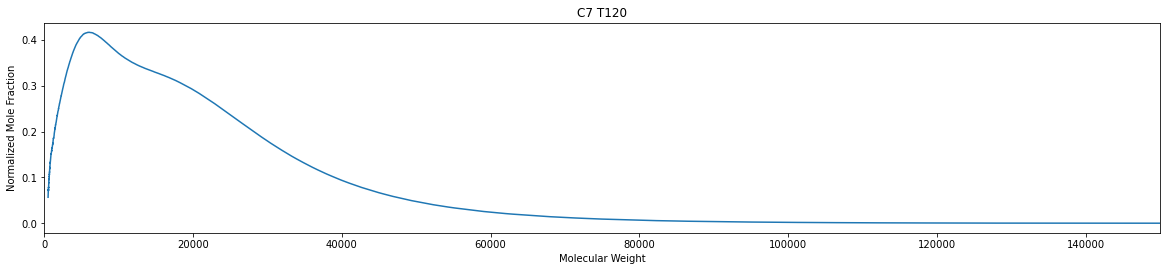

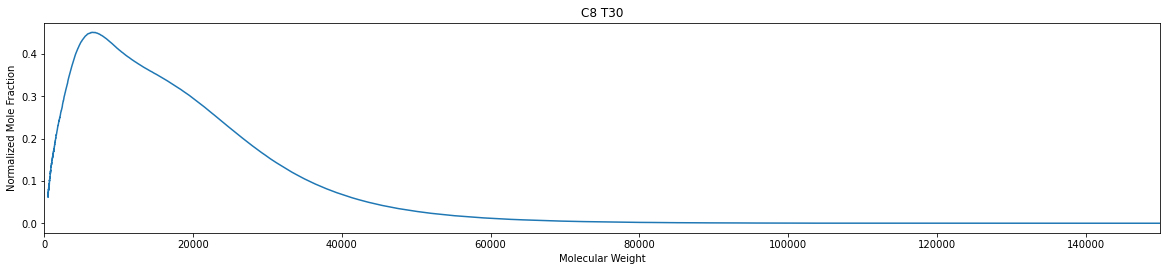

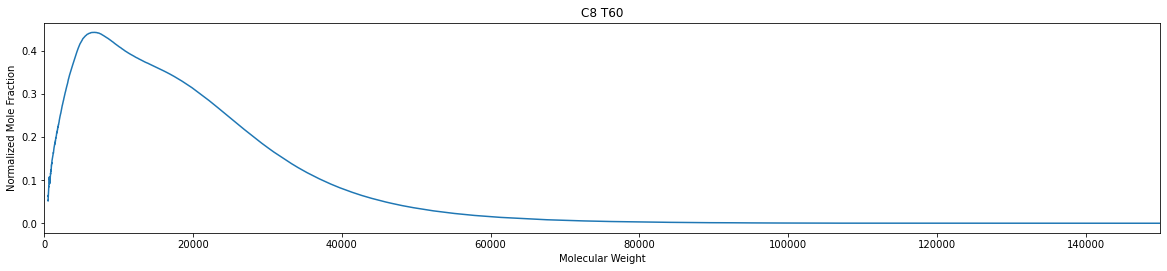

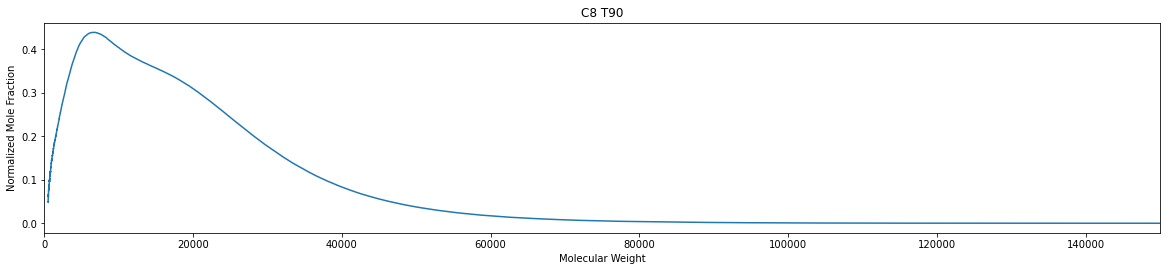

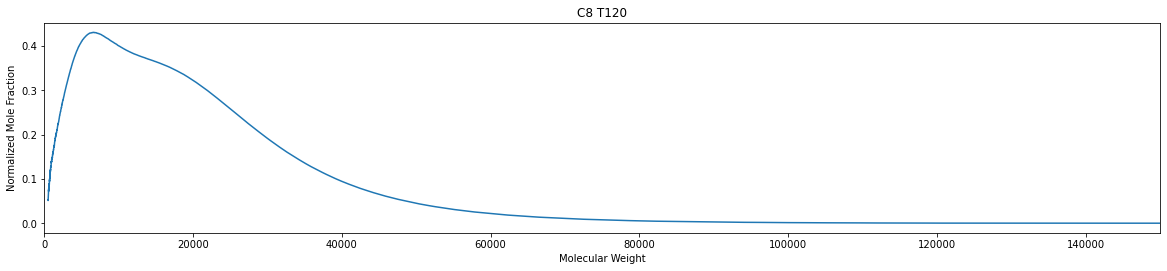

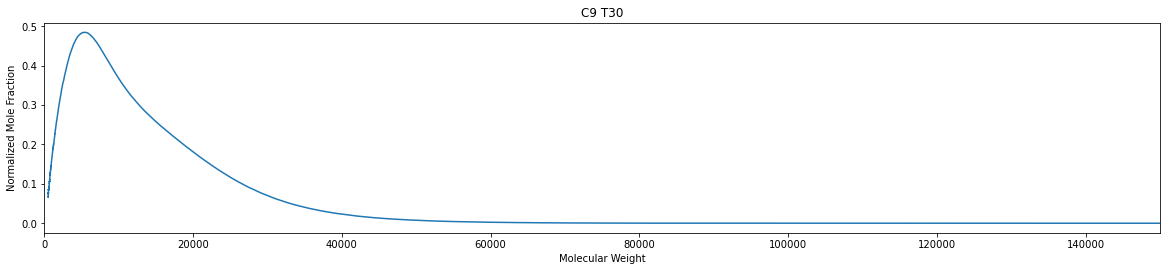

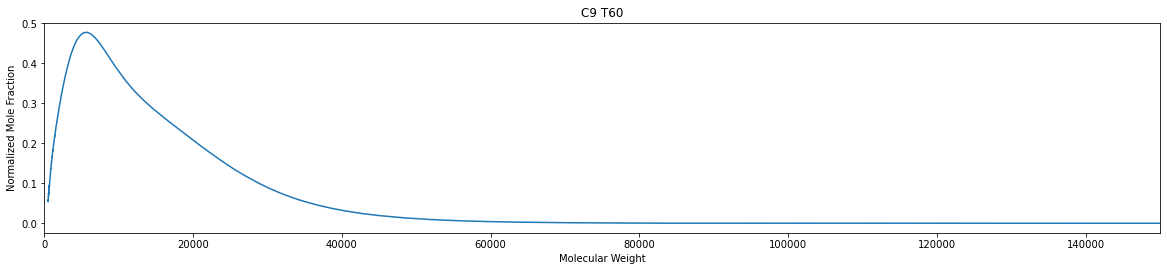

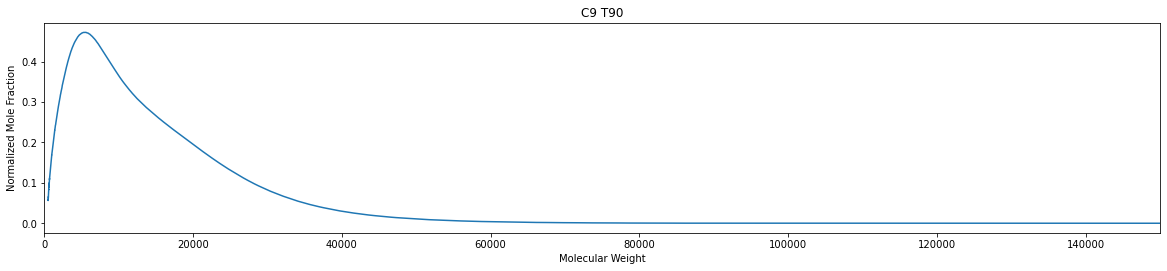

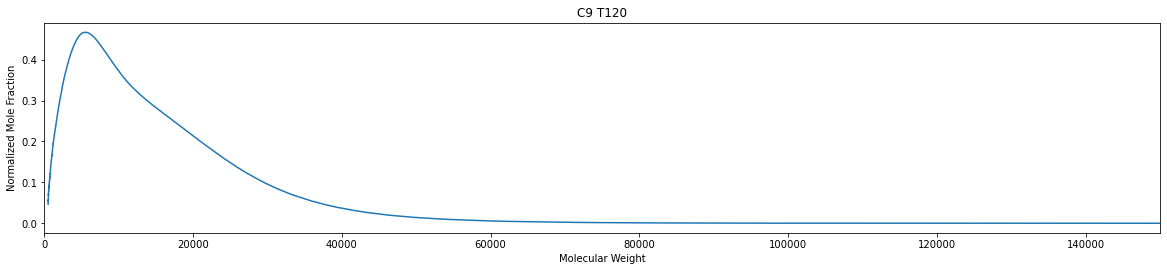

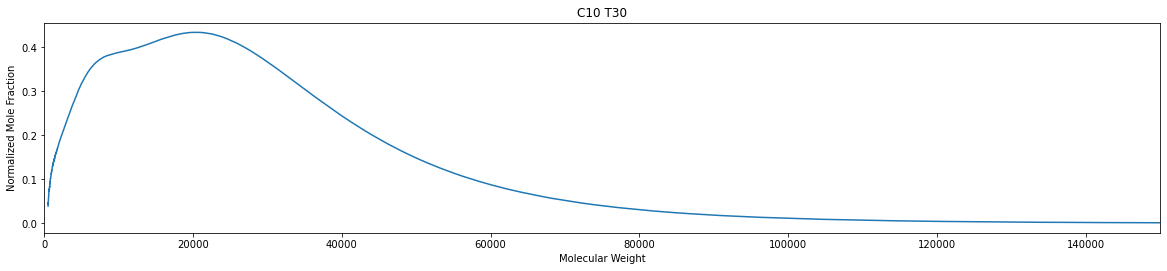

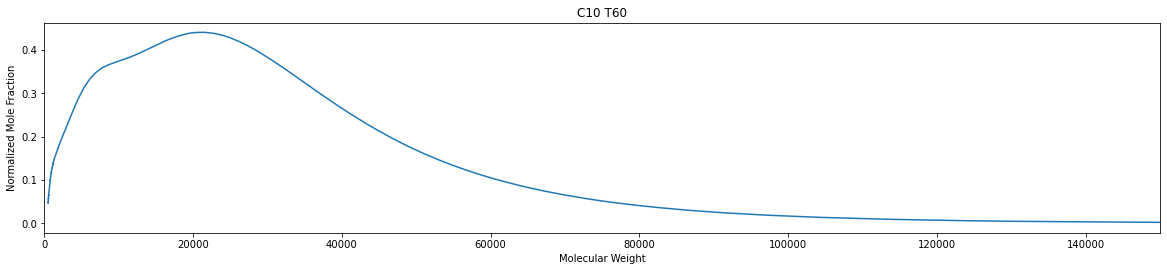

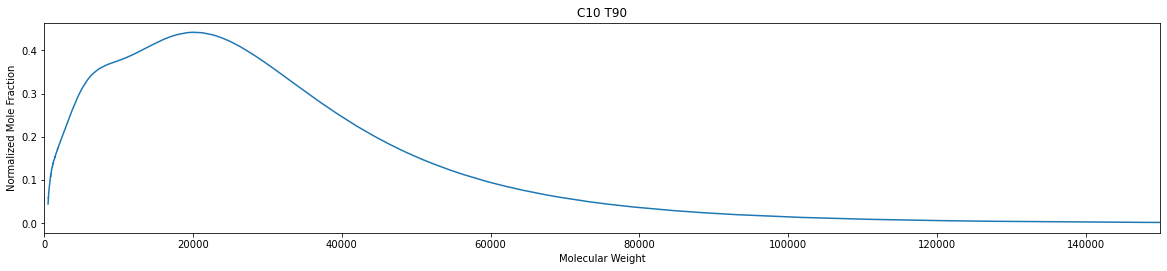

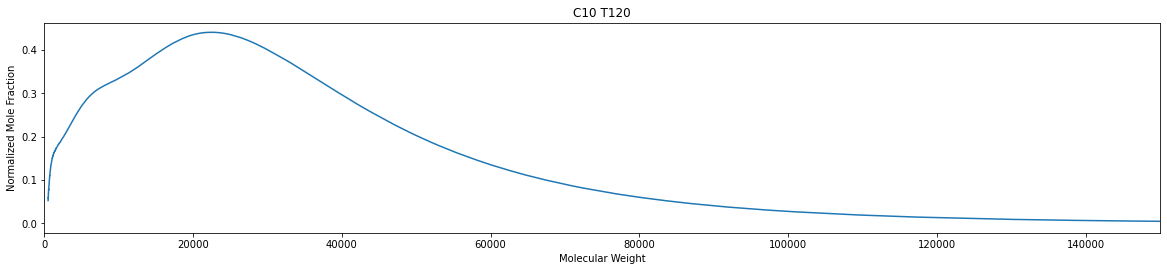

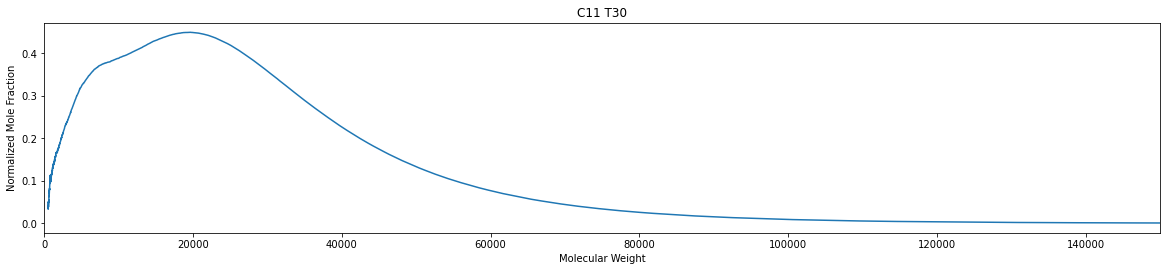

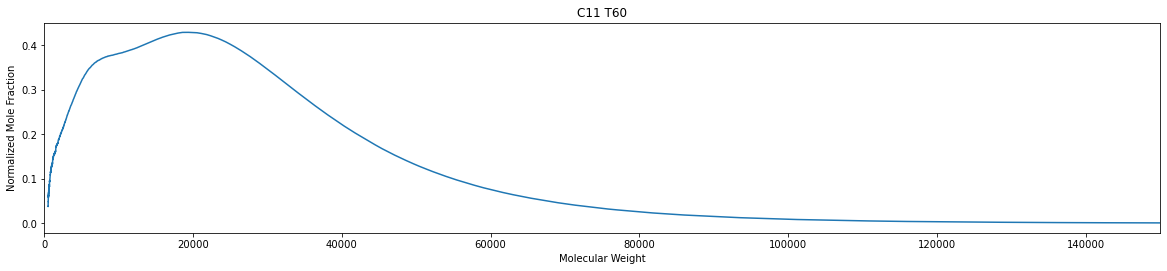

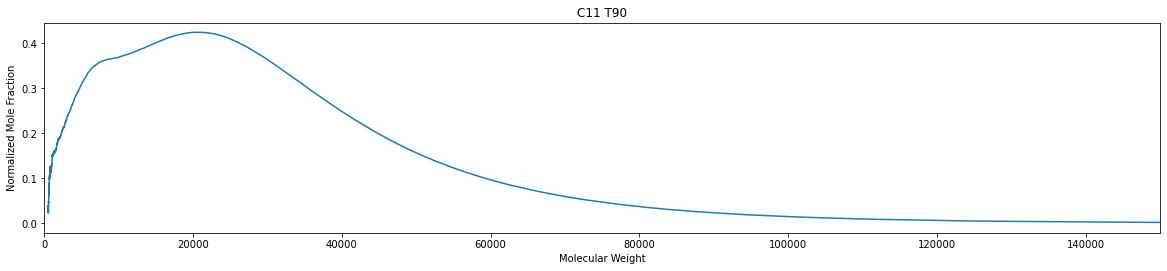

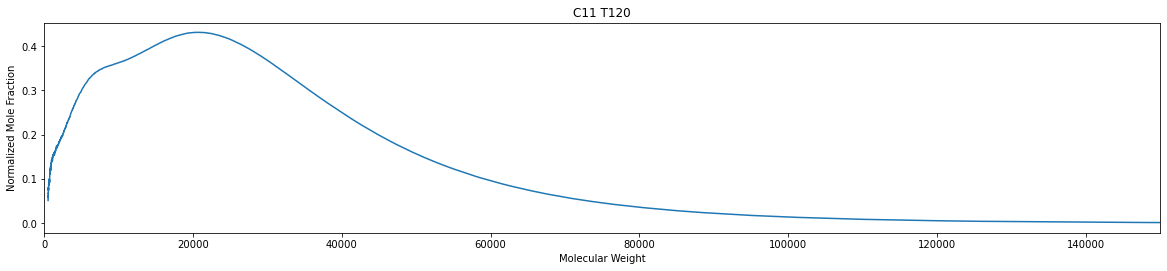

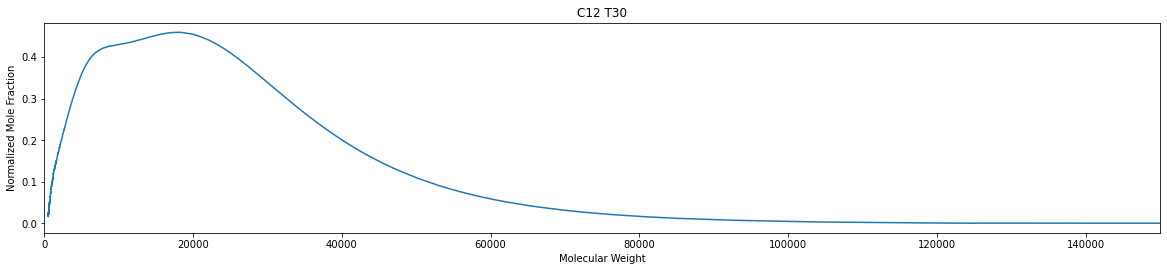

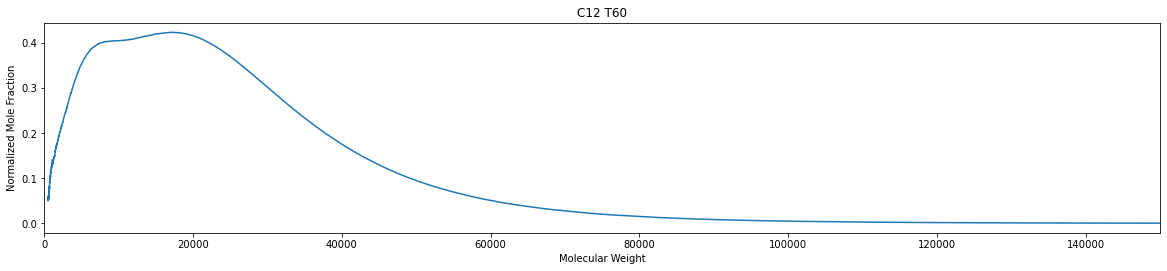

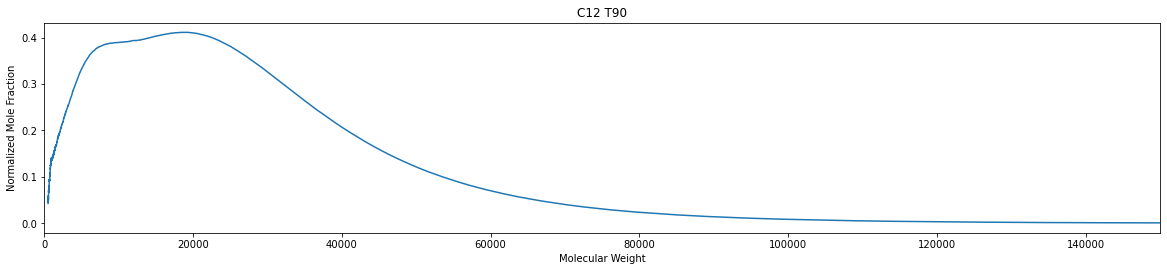

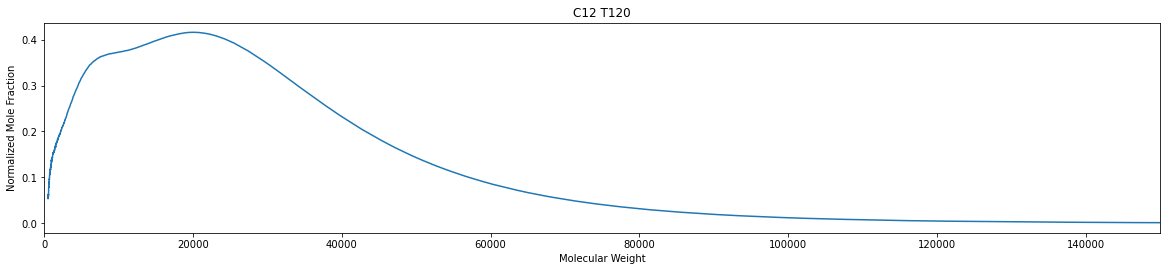

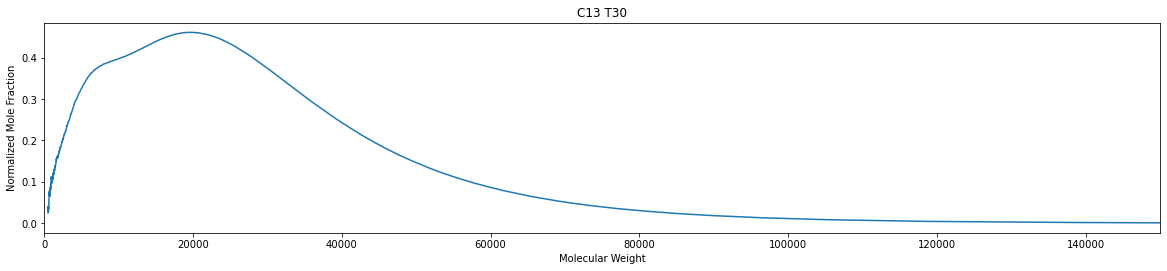

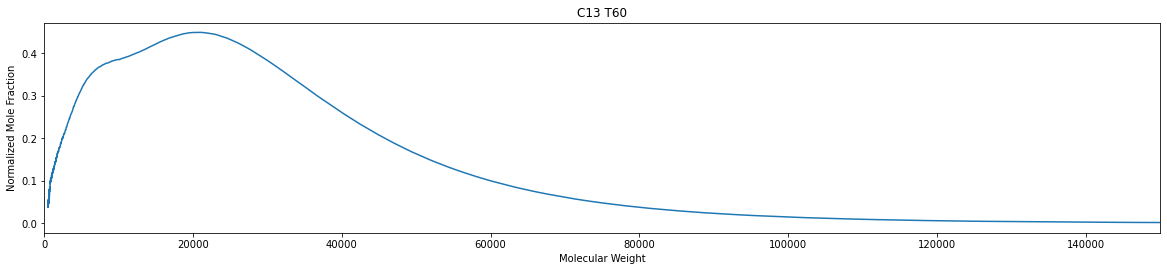

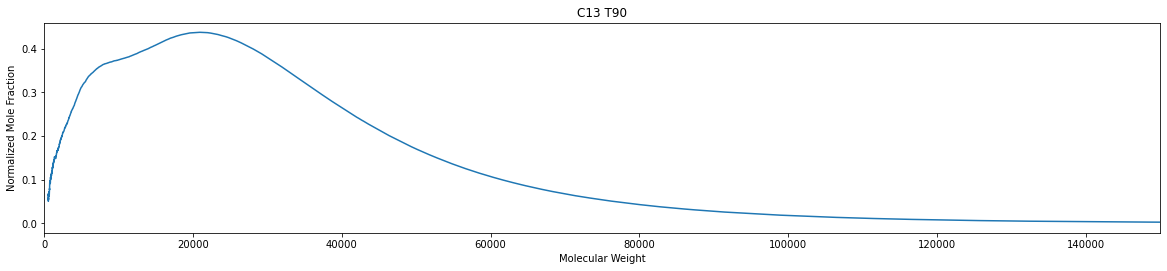

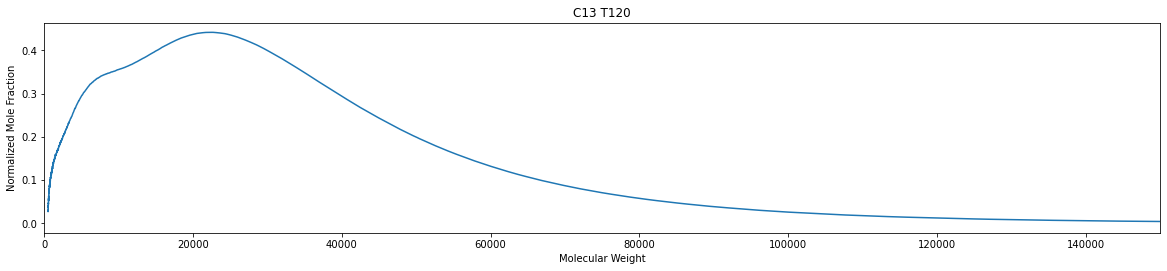

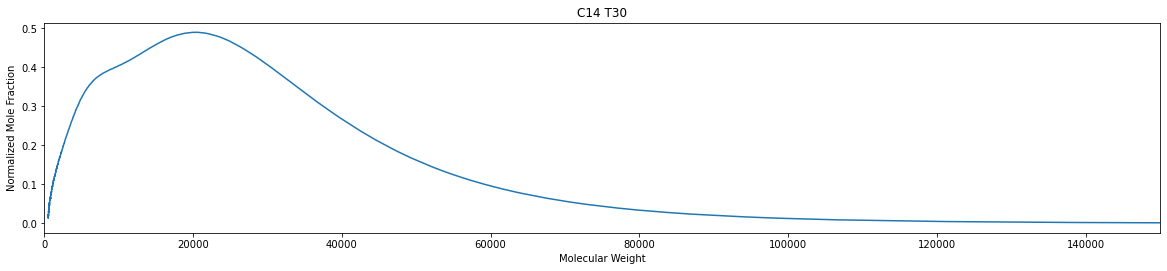

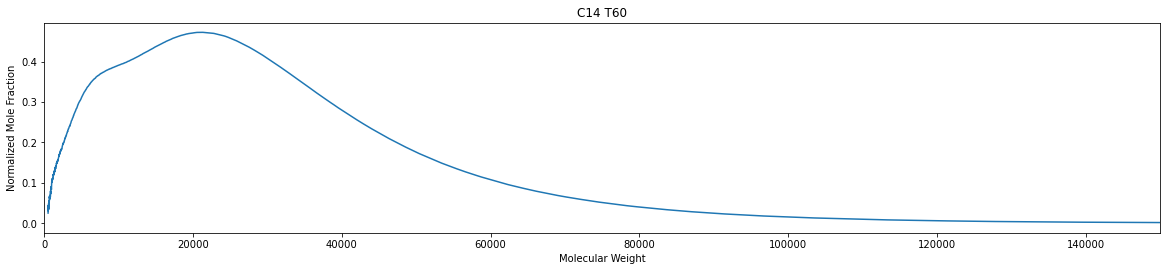

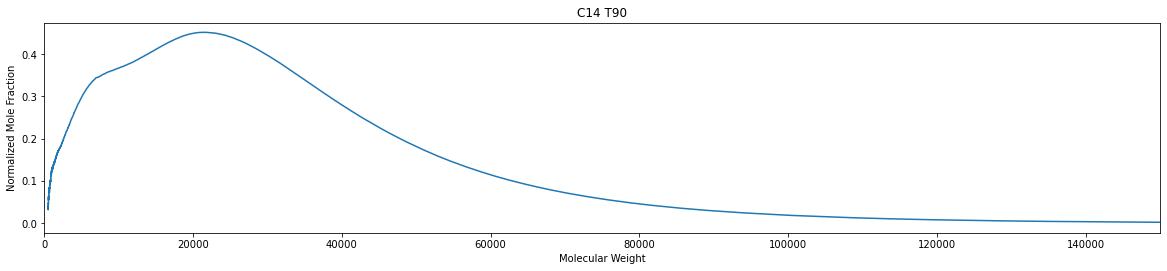

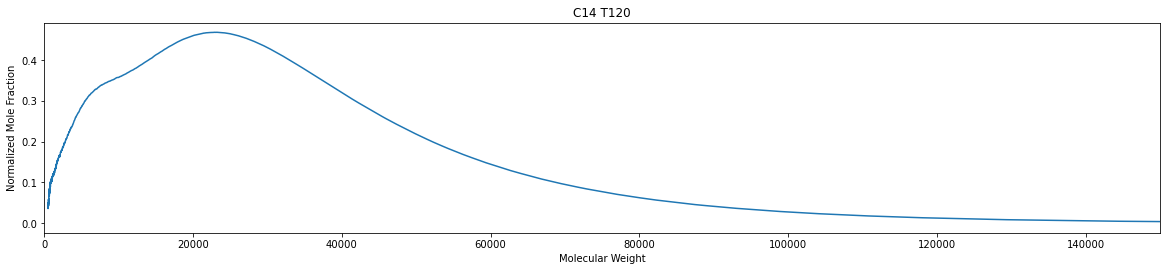

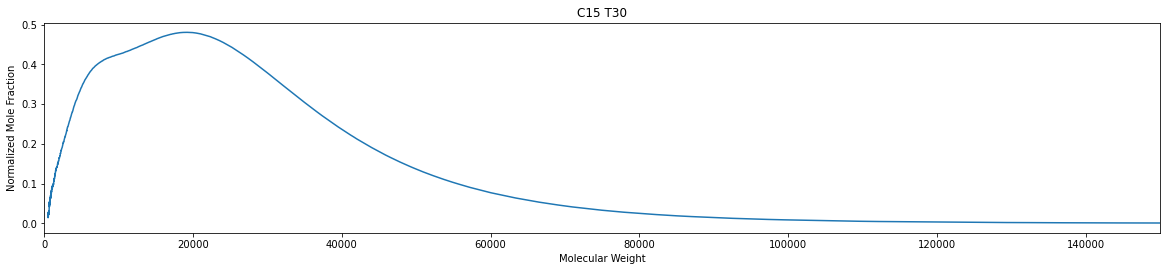

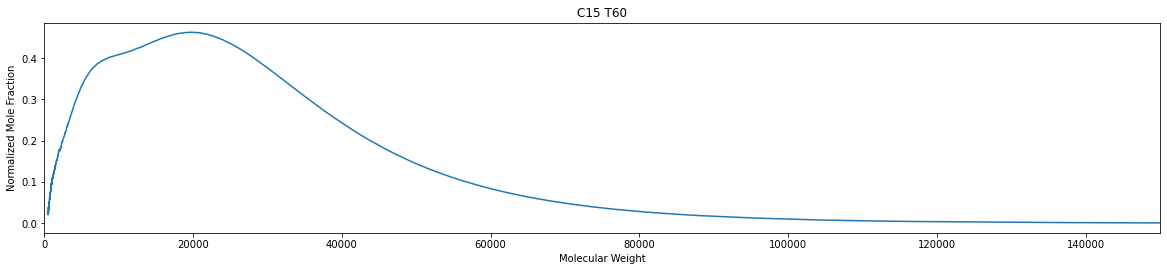

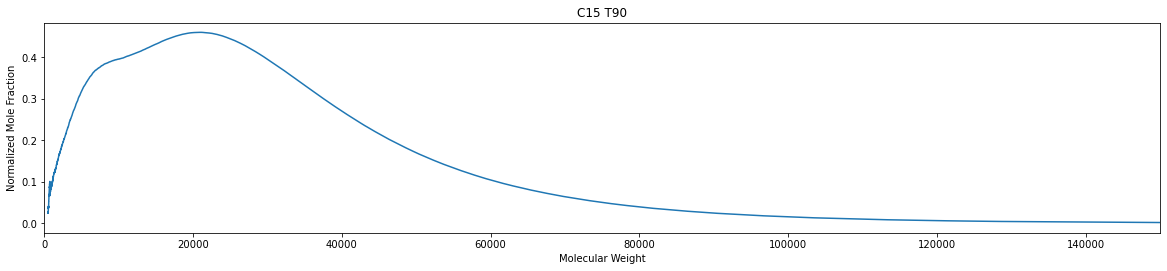

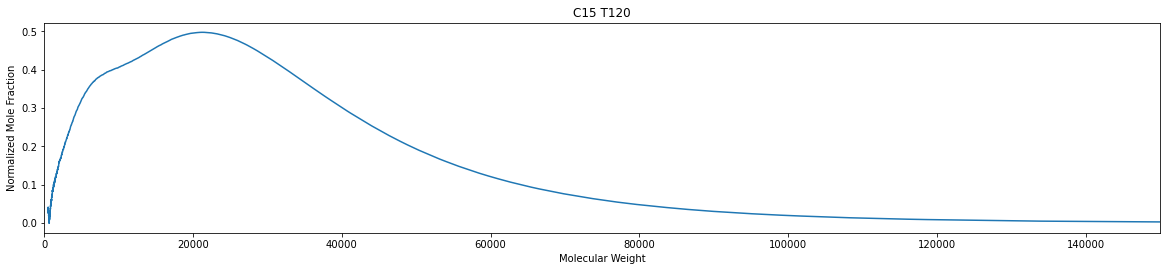

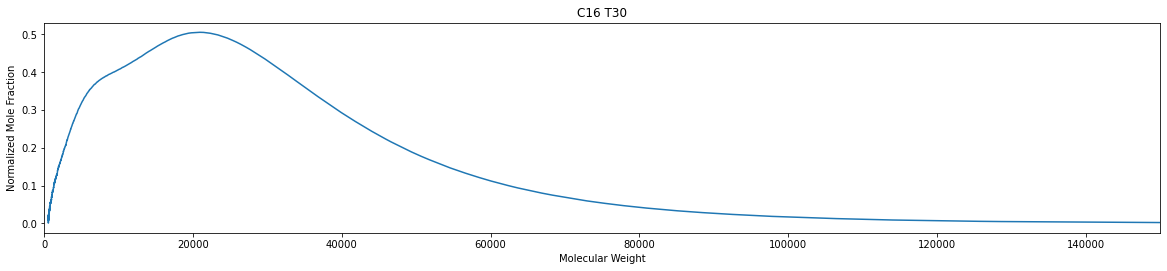

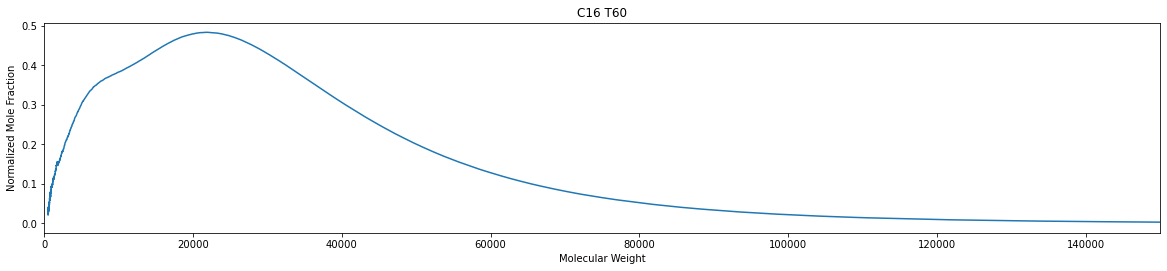

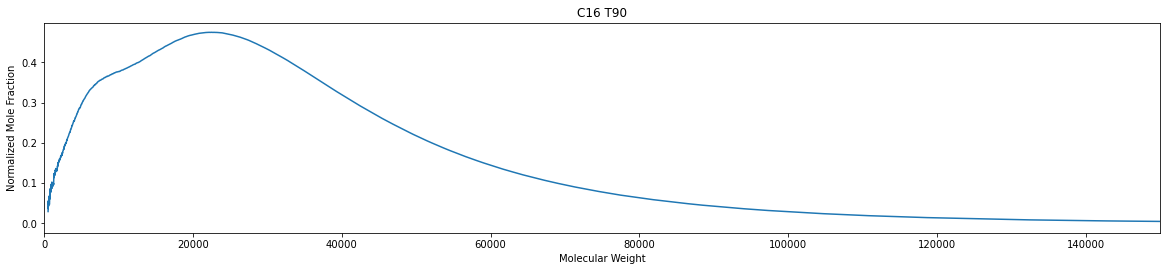

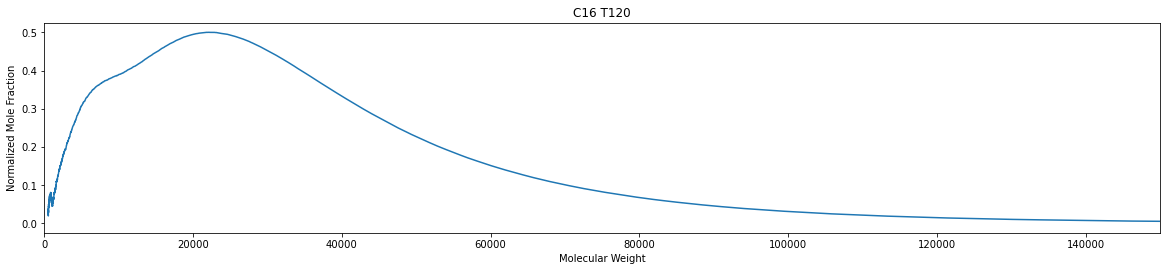

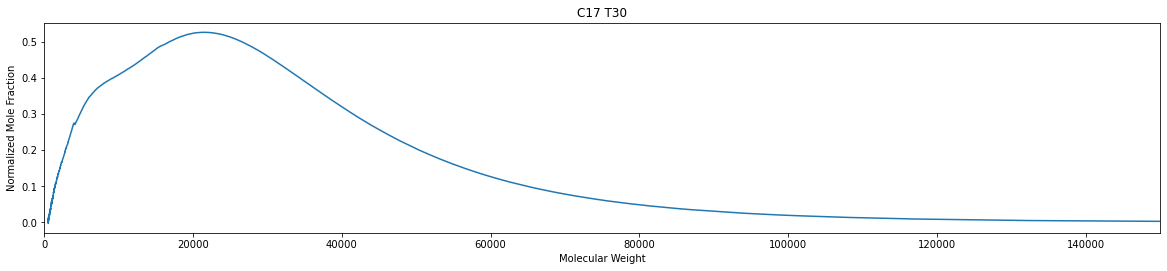

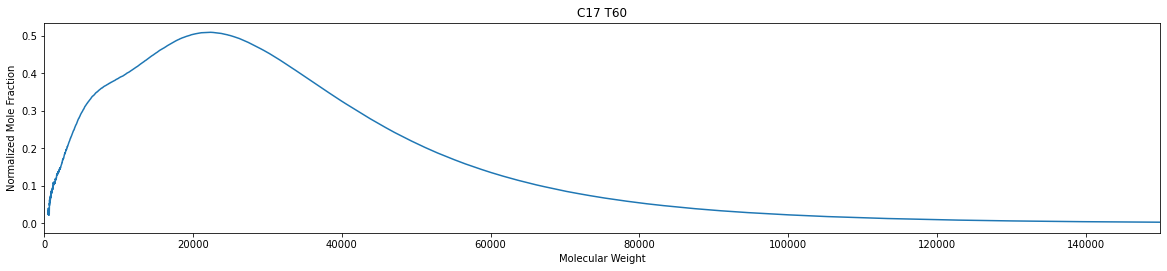

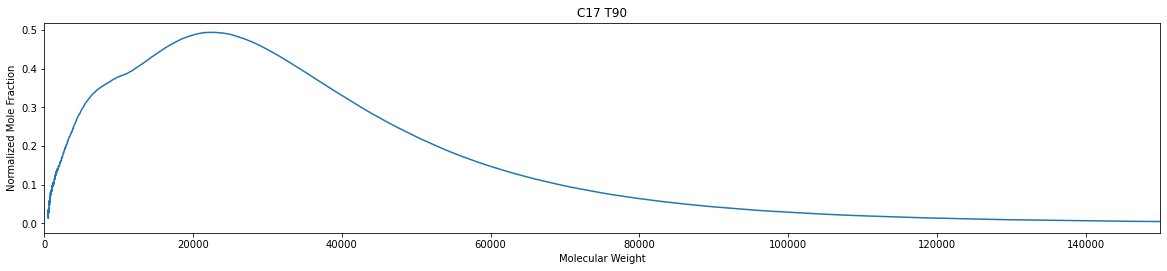

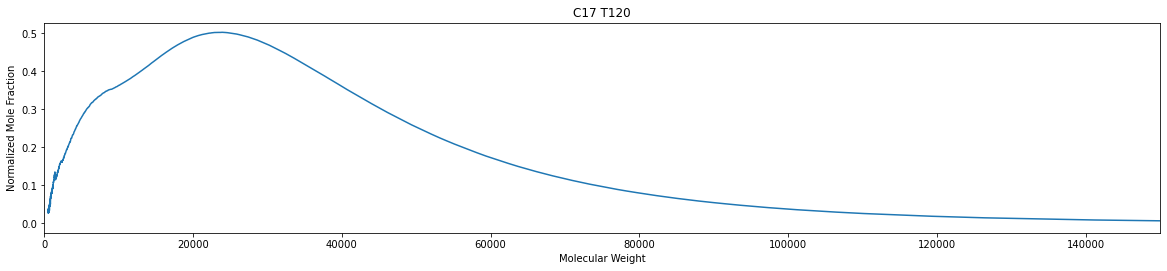

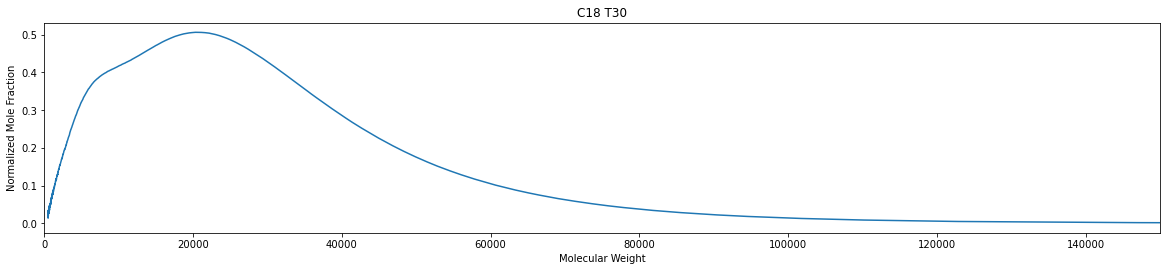

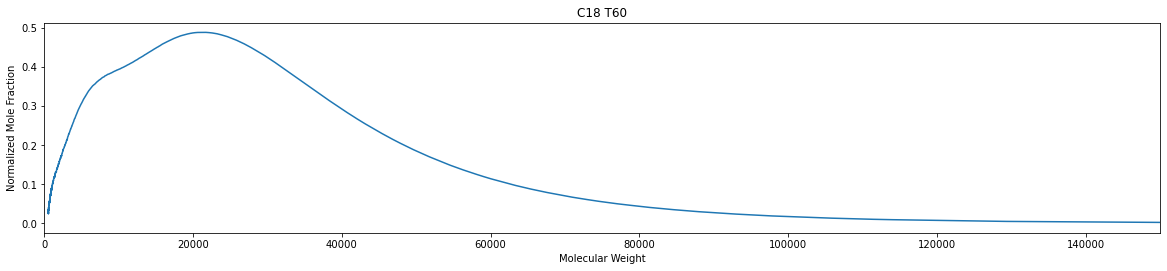

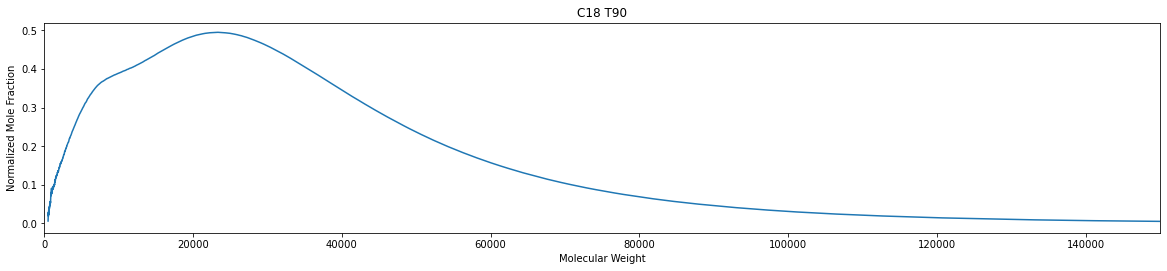

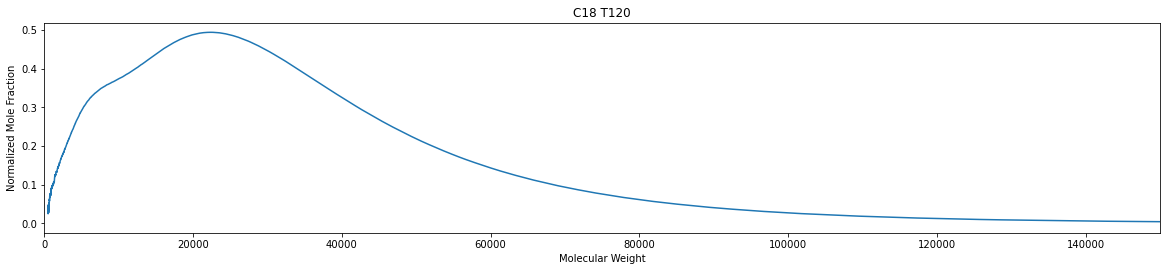

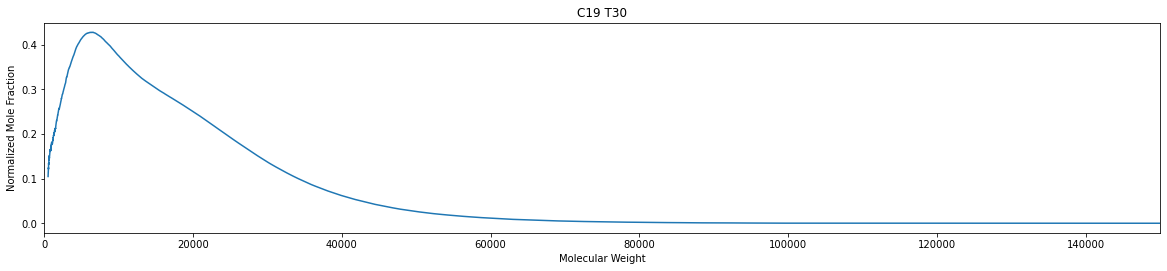

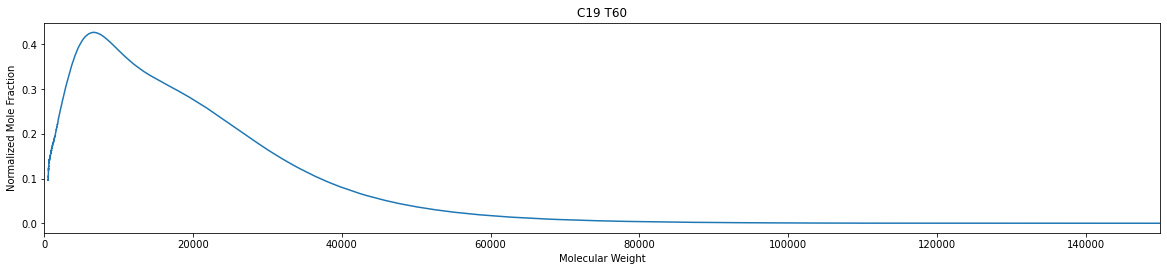

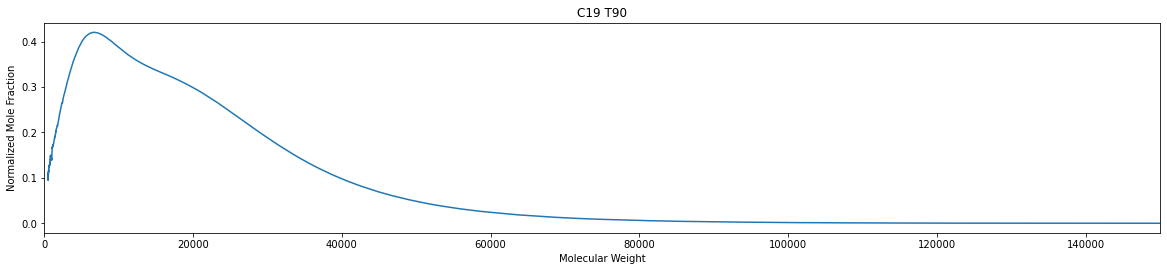

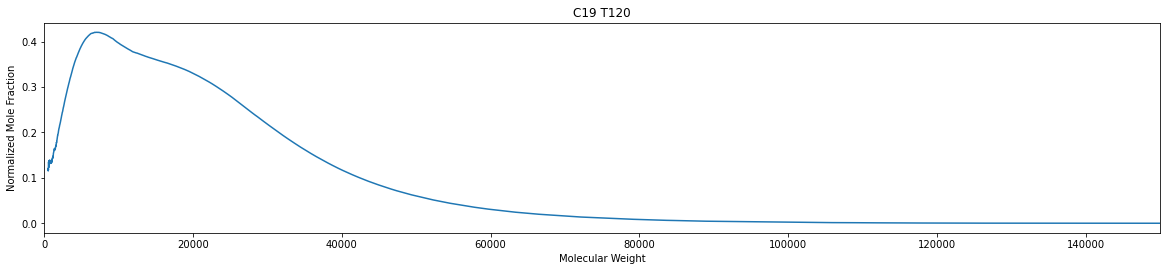

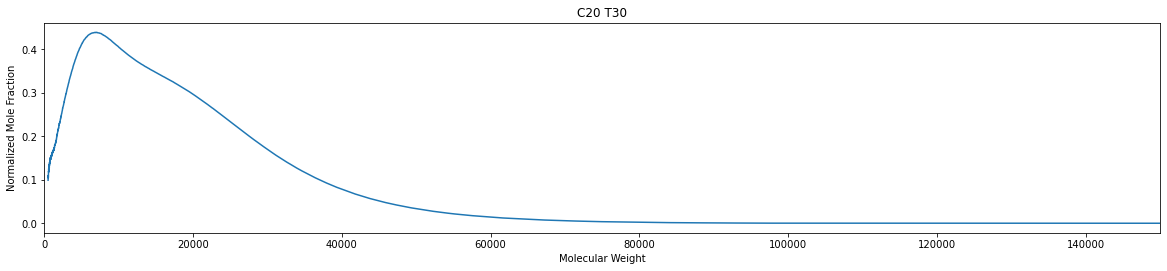

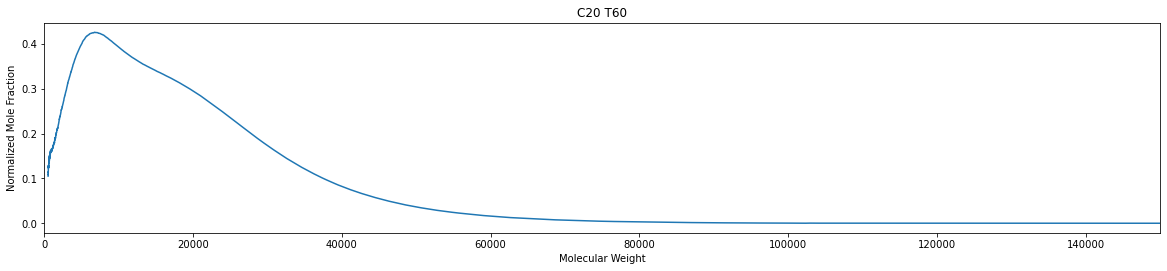

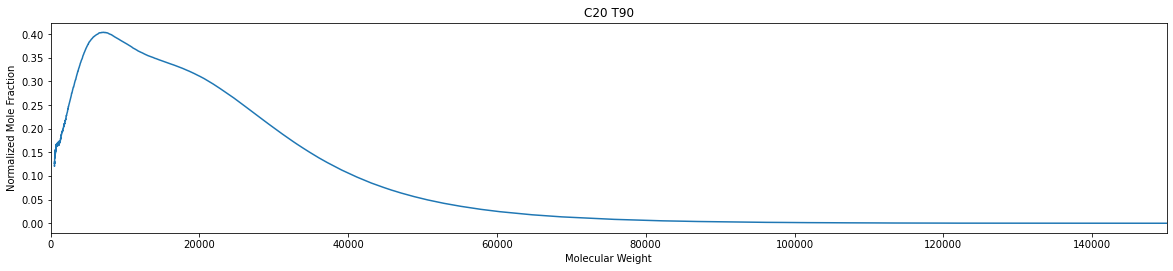

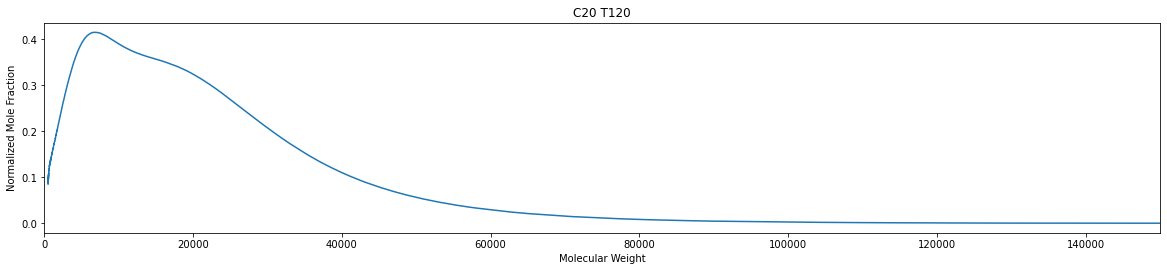

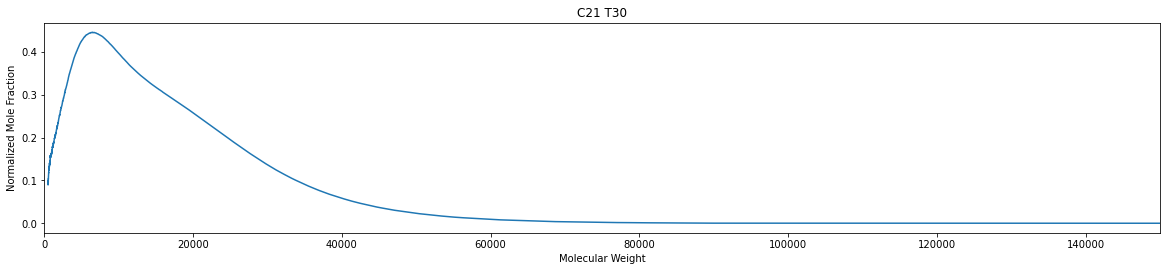

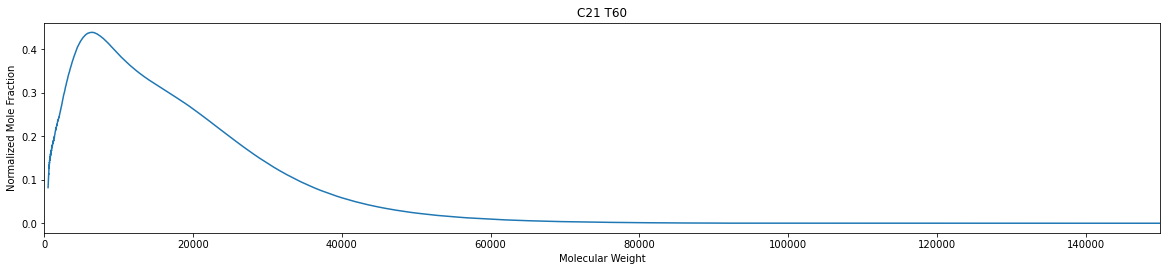

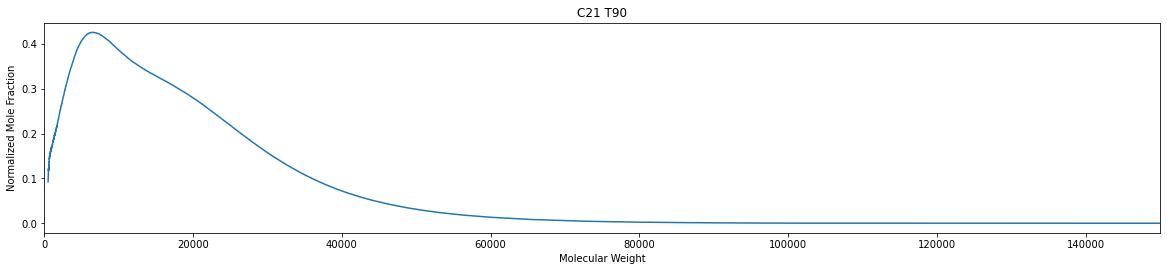

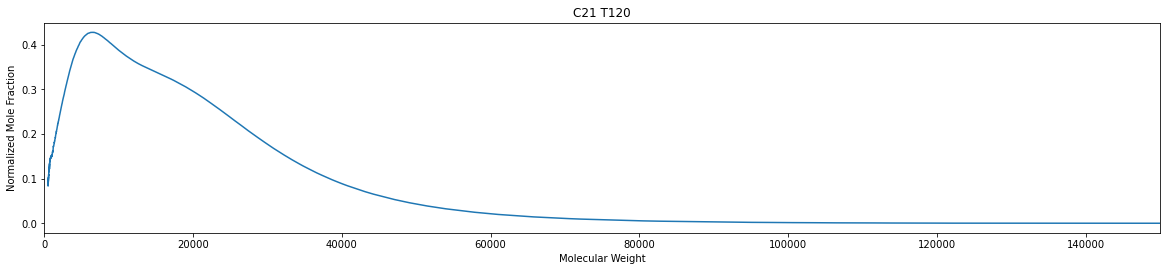

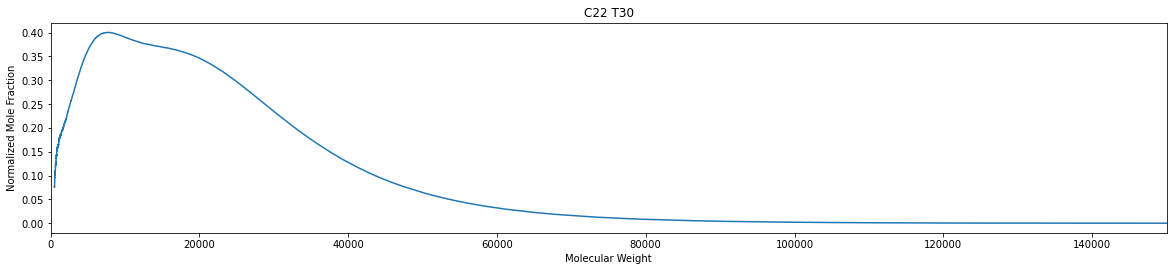

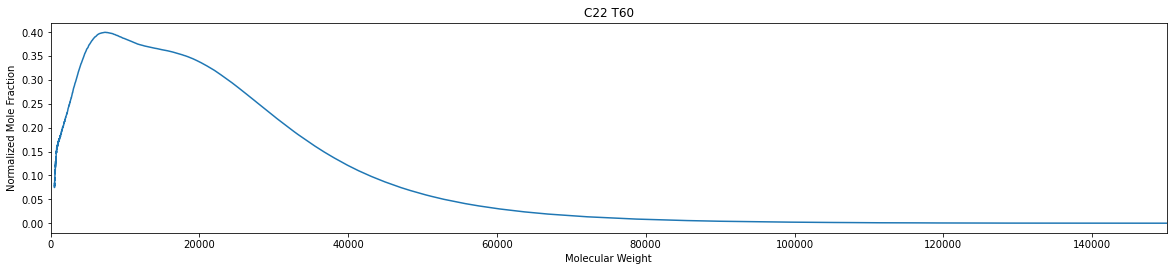

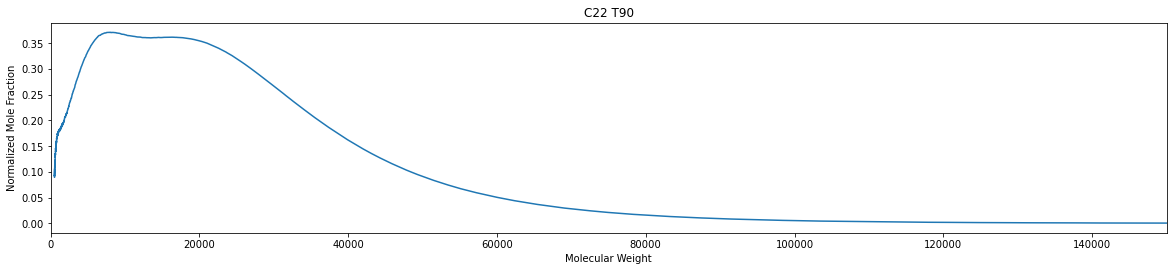

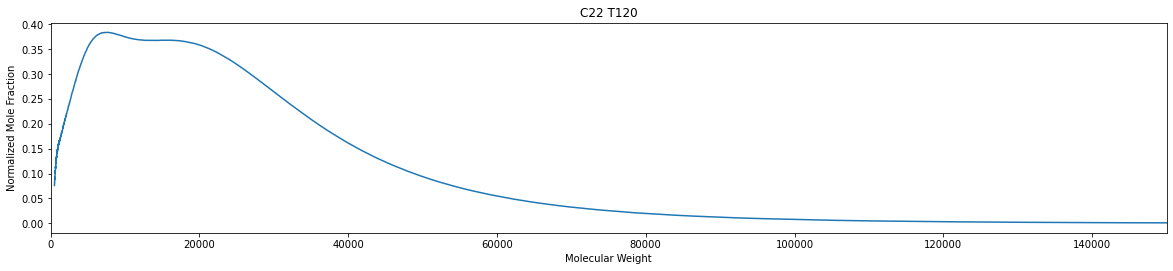

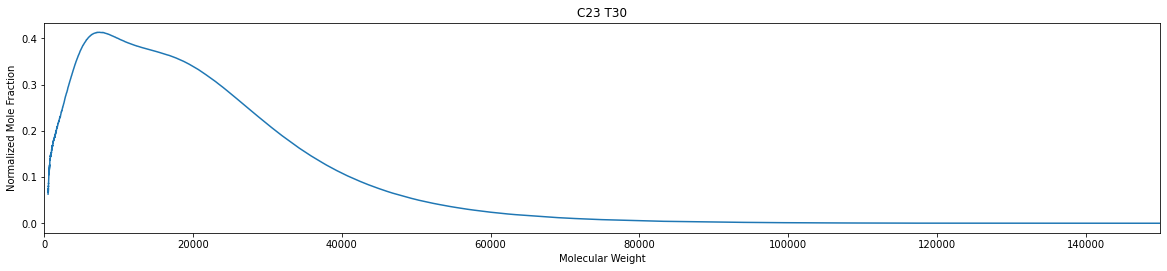

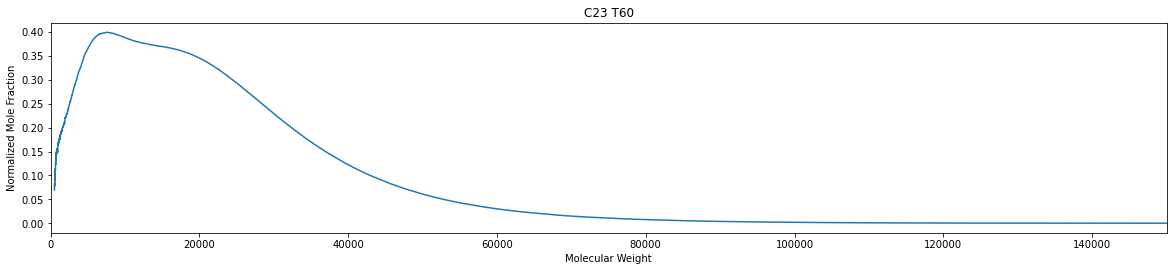

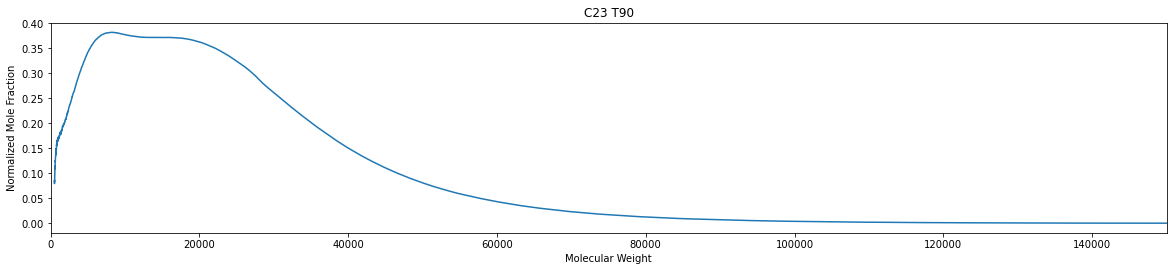

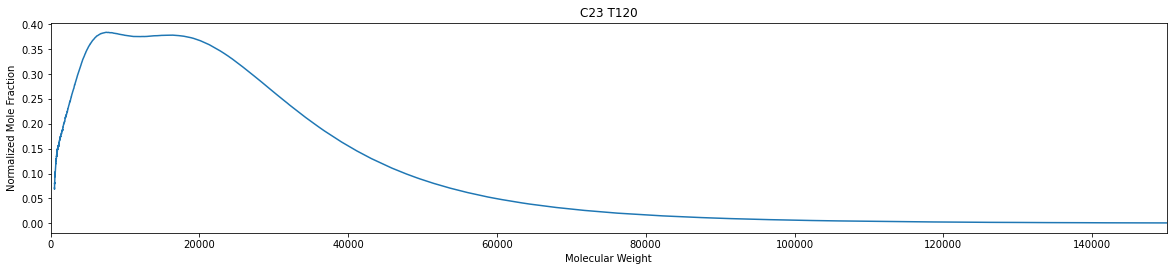

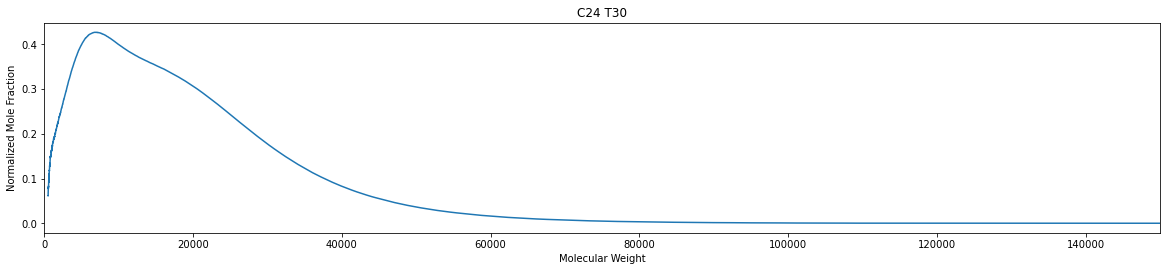

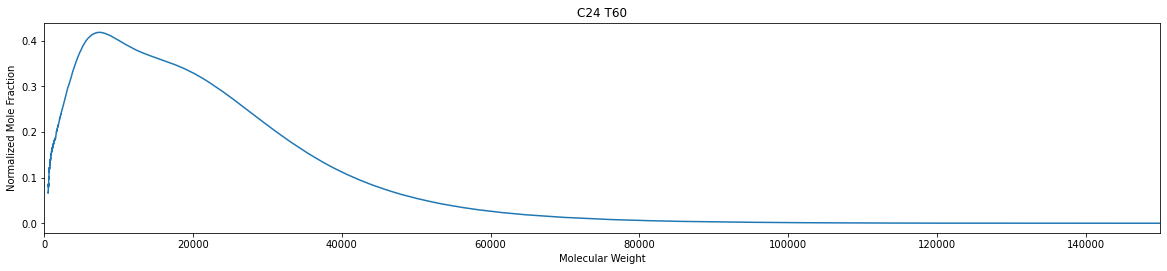

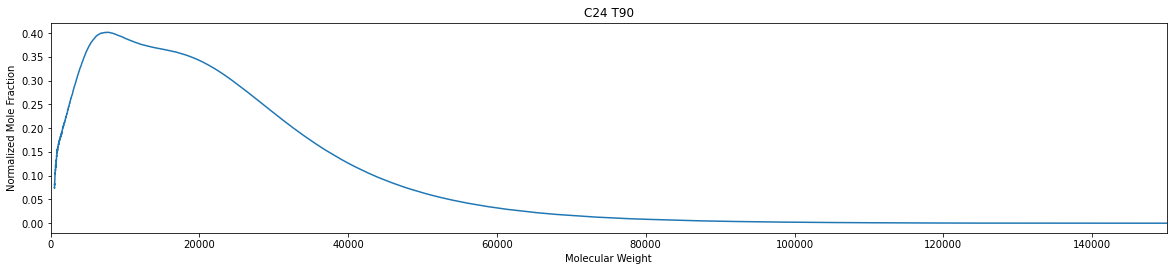

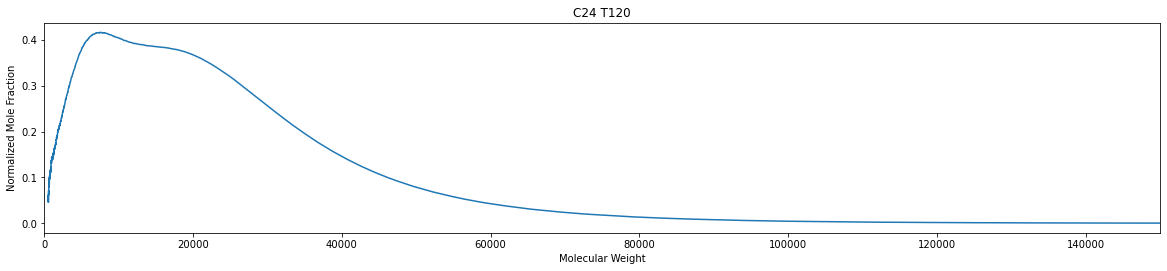

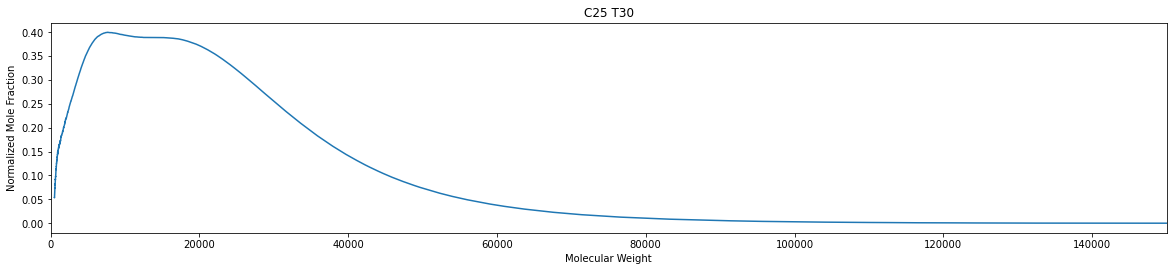

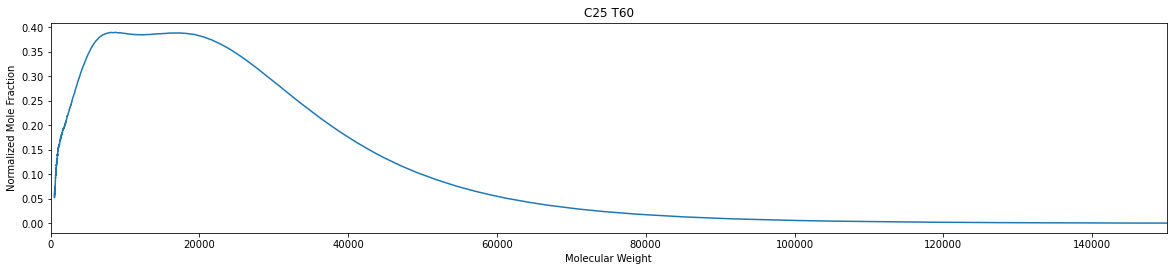

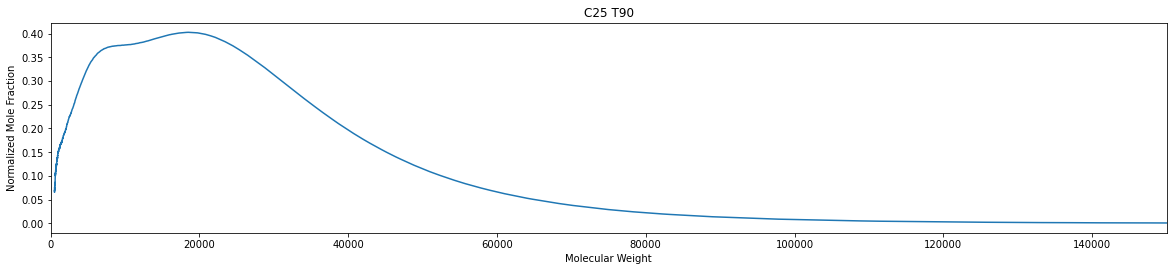

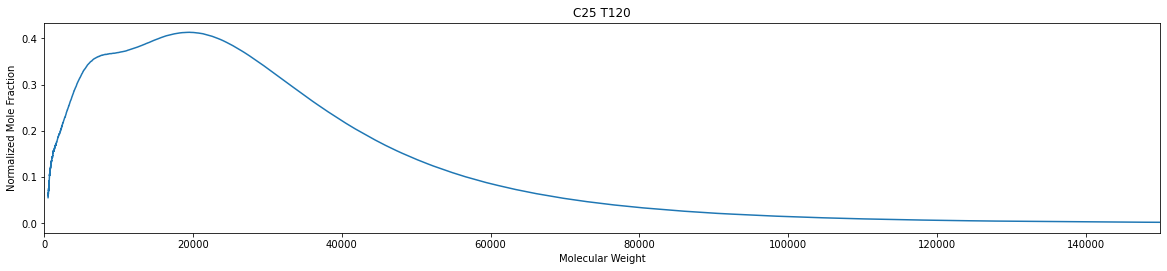

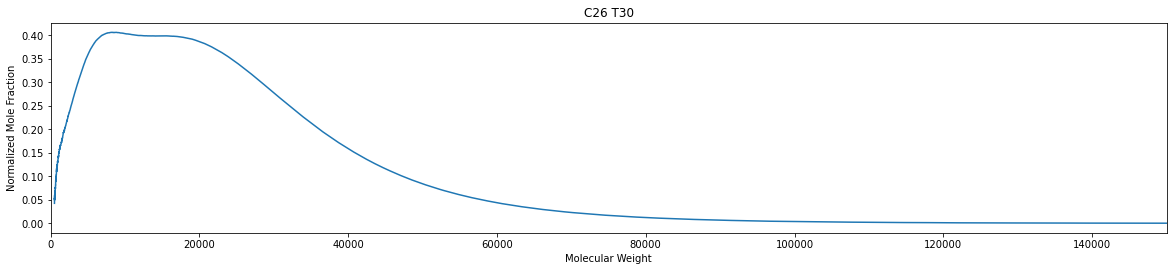

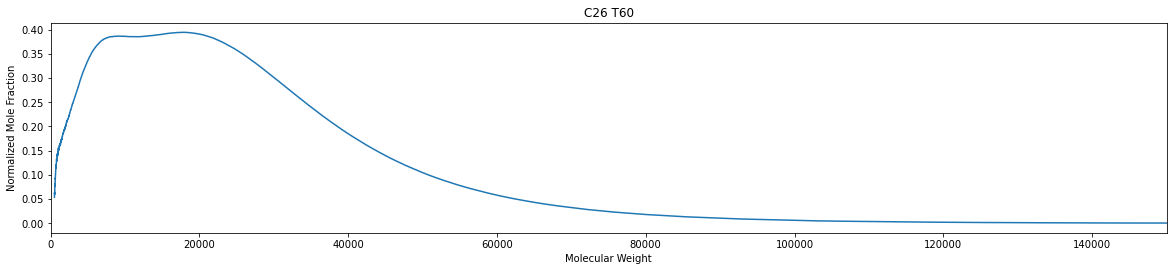

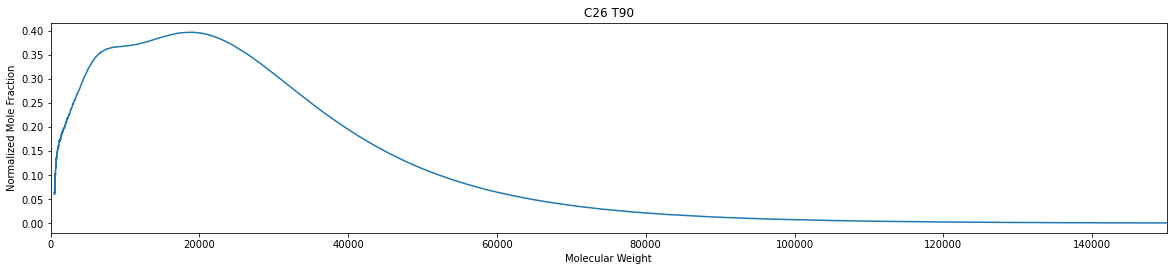

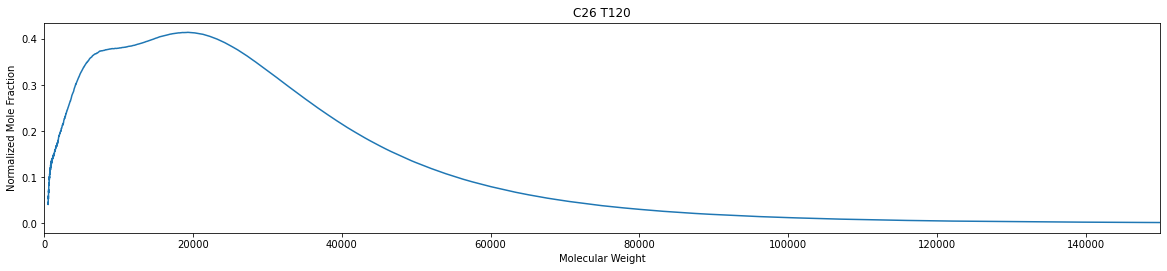

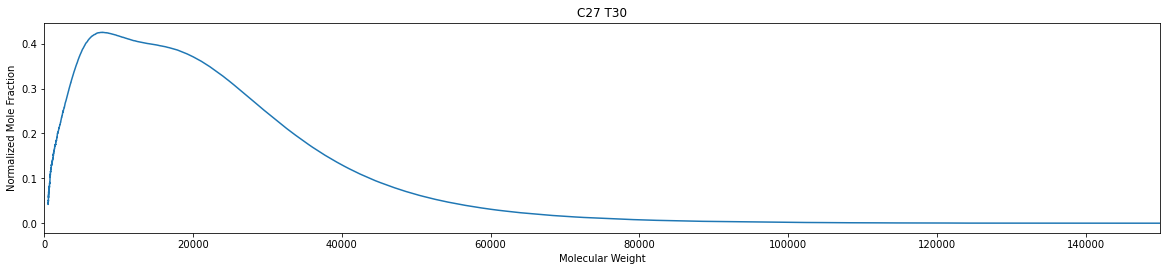

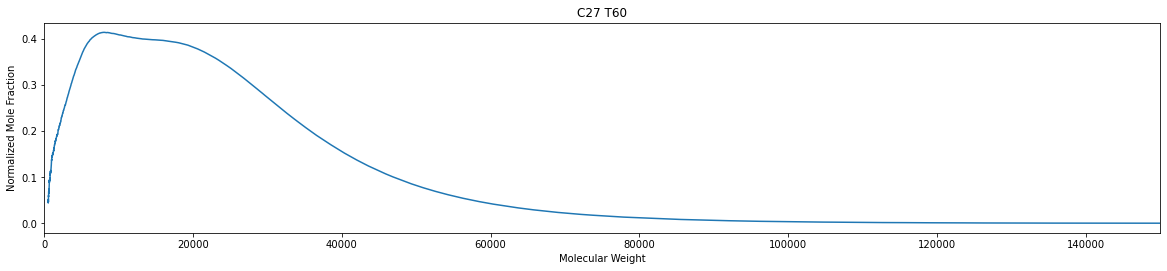

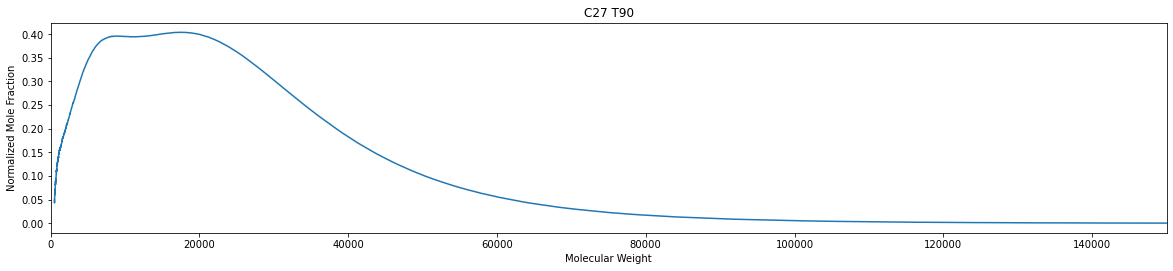

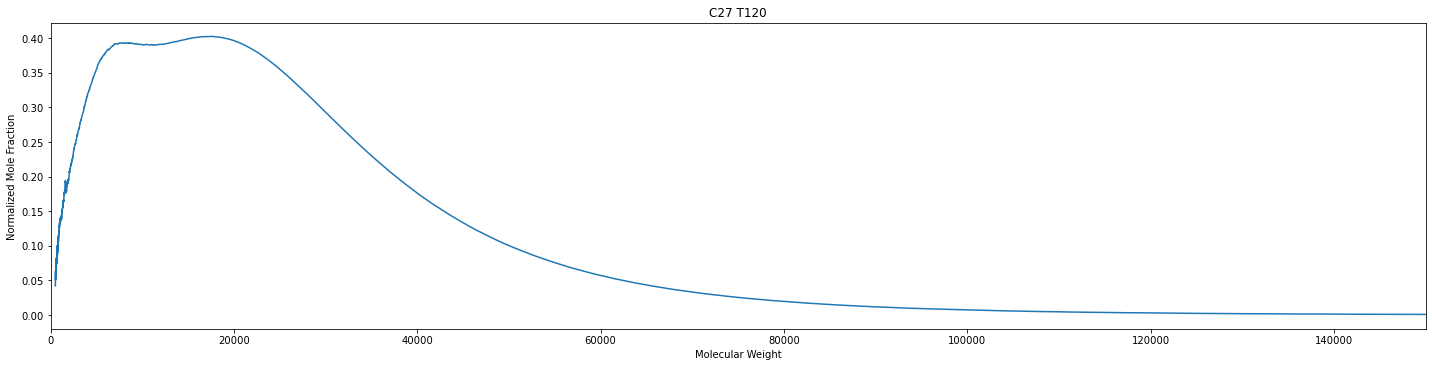

In [14]:
i=0

for index, item in df.iterrows():
    i+=1
    x = df.columns
    y = item
    plt.figure(figsize = (20,500))
    plt.subplot(108,1,i)
    plt.plot(x,y)
    plt.title(str(index))
    plt.xlim(0,150000)
    plt.xlabel('Molecular Weight')
    plt.ylabel('Normalized Mole Fraction')
    
plt.tight_layout()
plt.show()

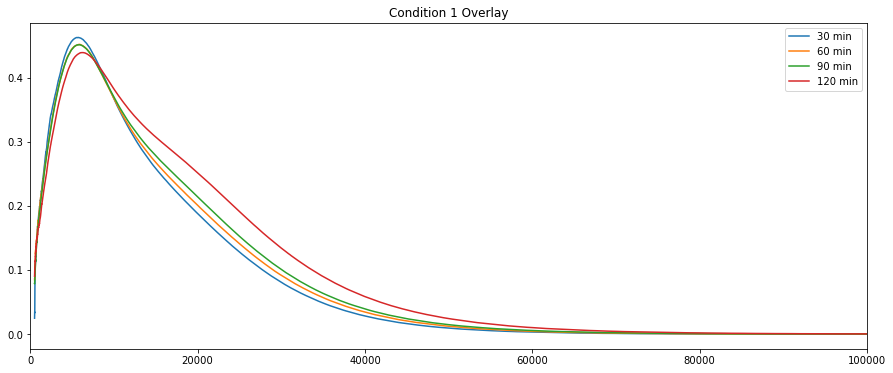

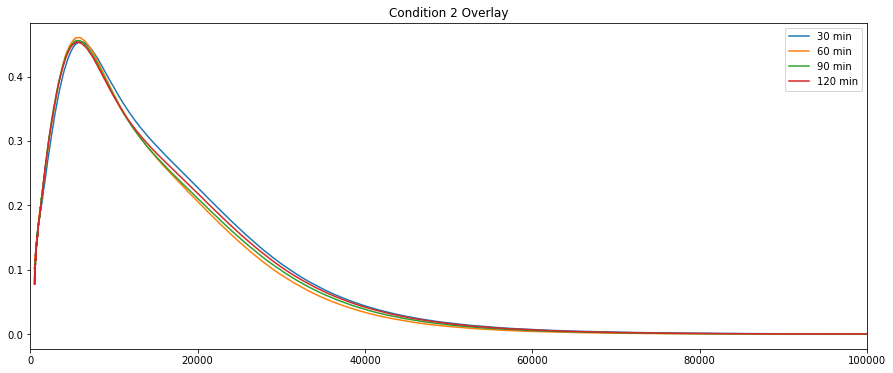

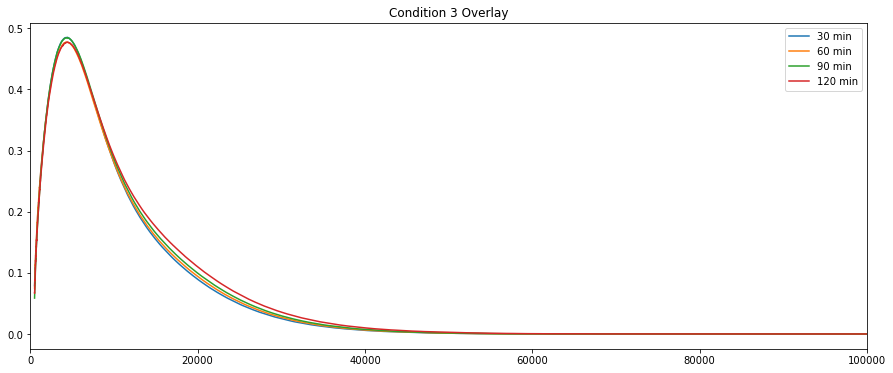

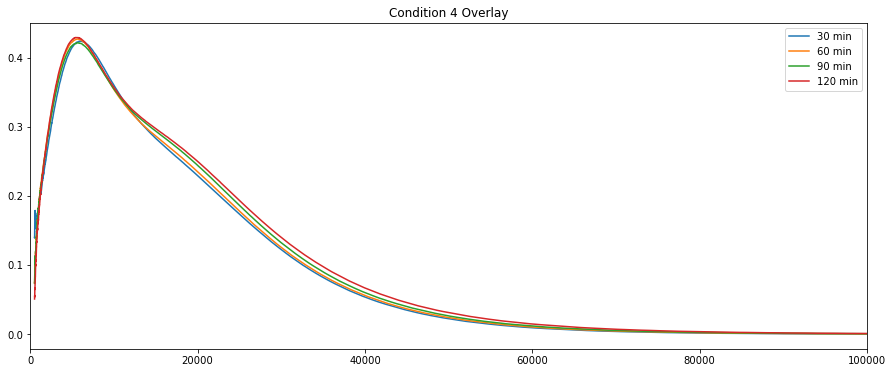

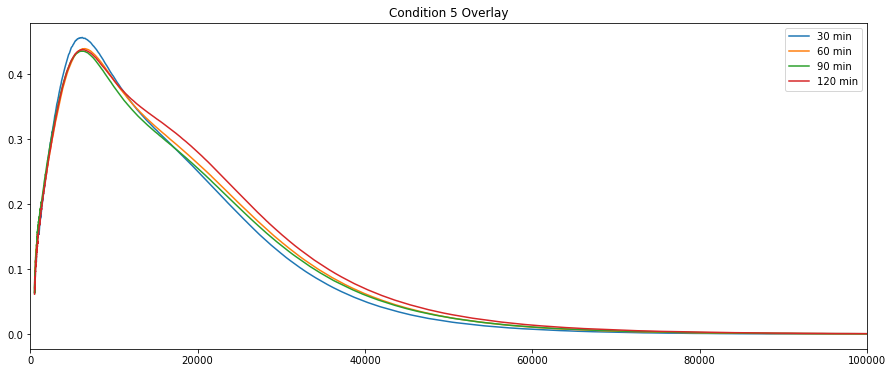

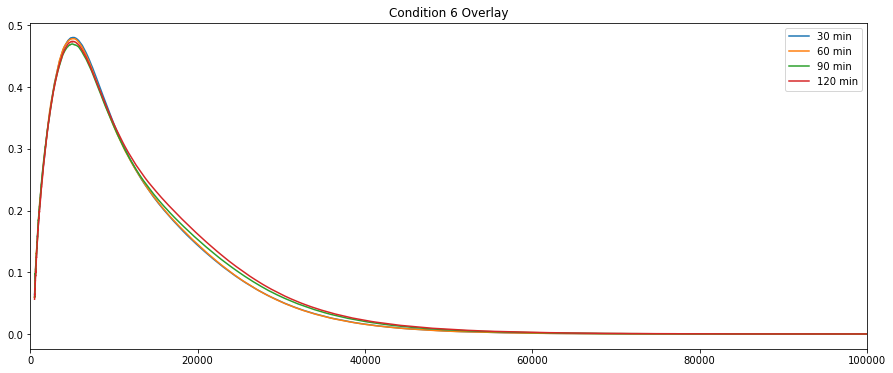

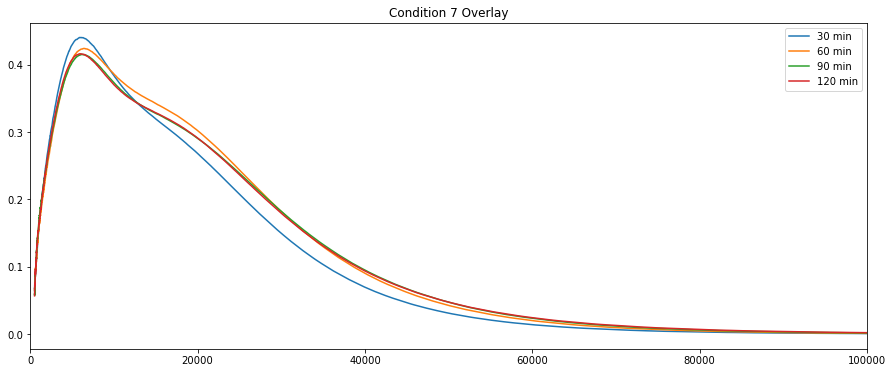

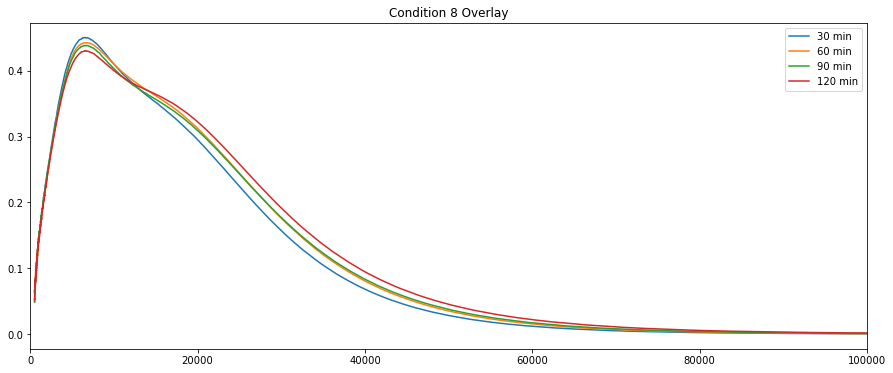

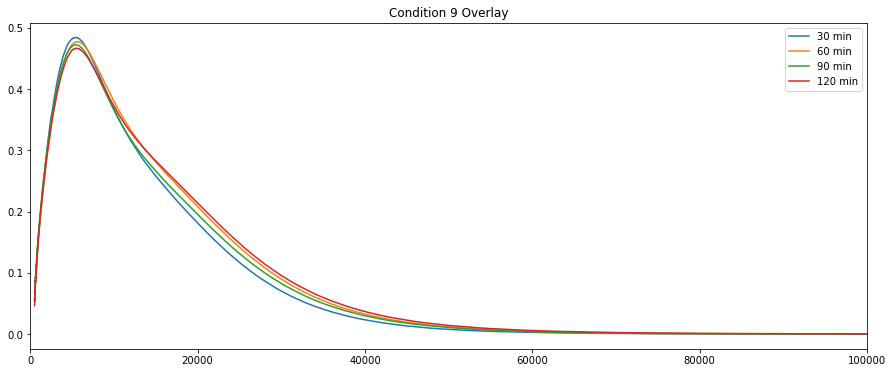

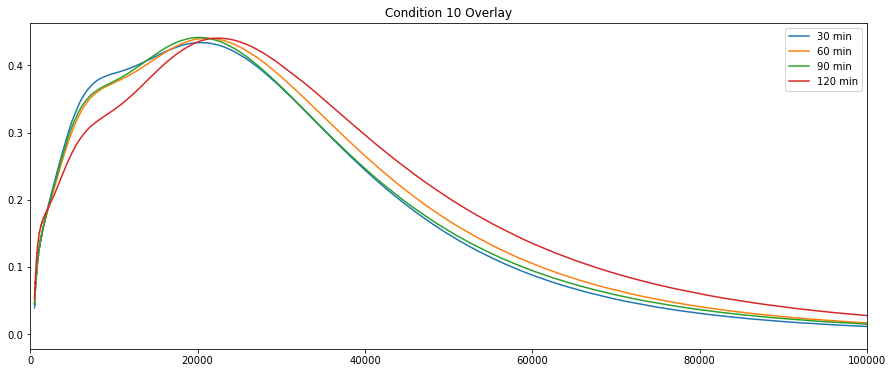

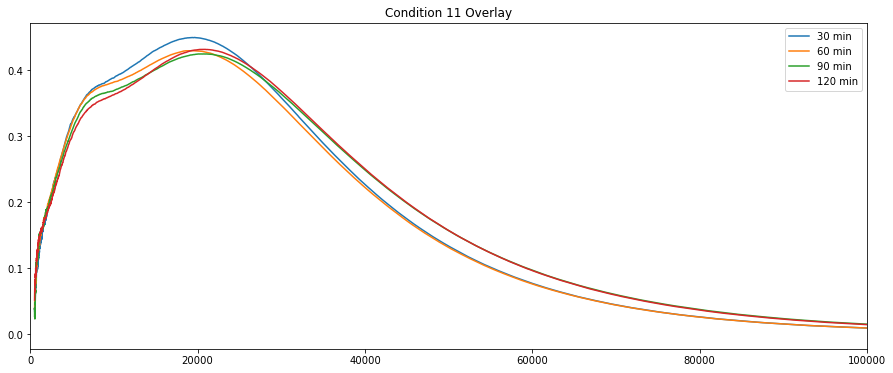

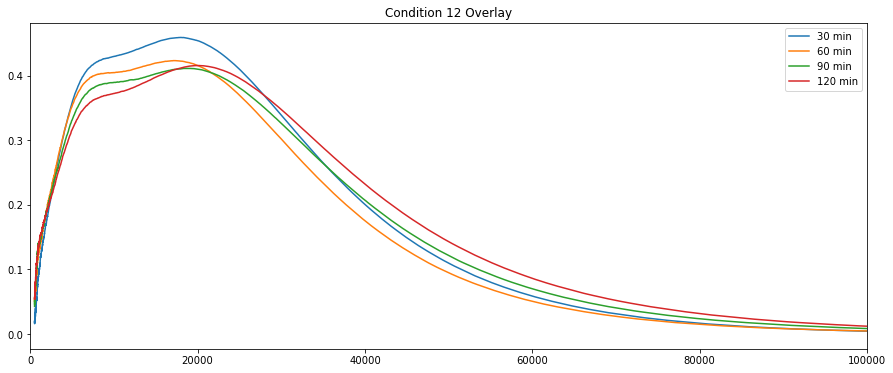

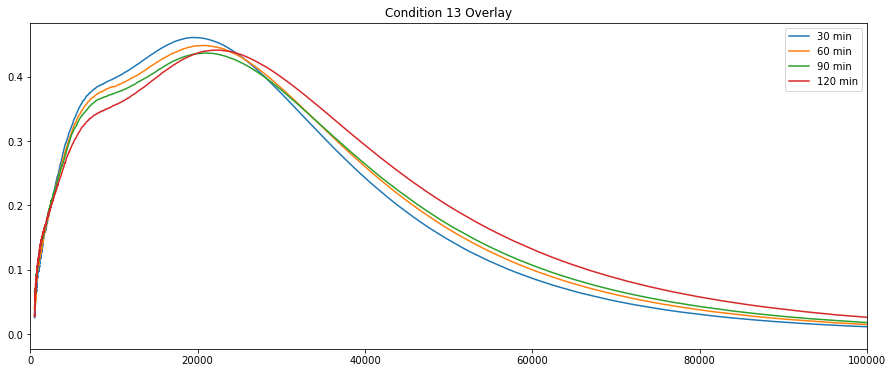

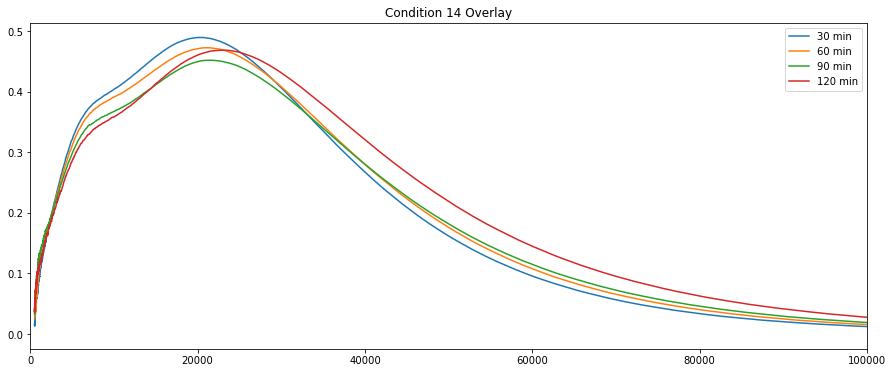

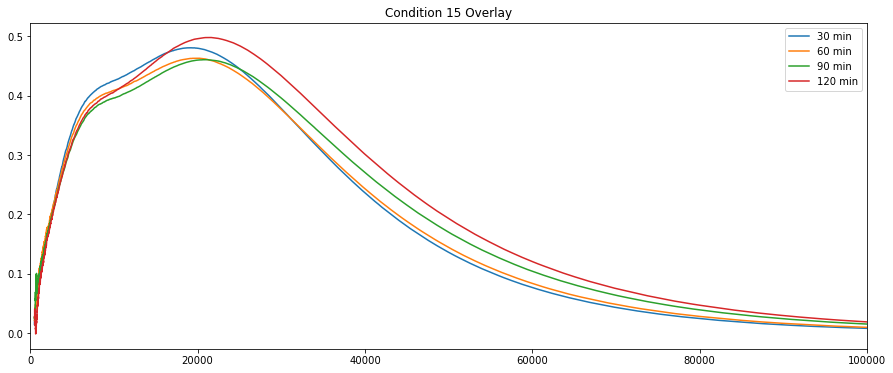

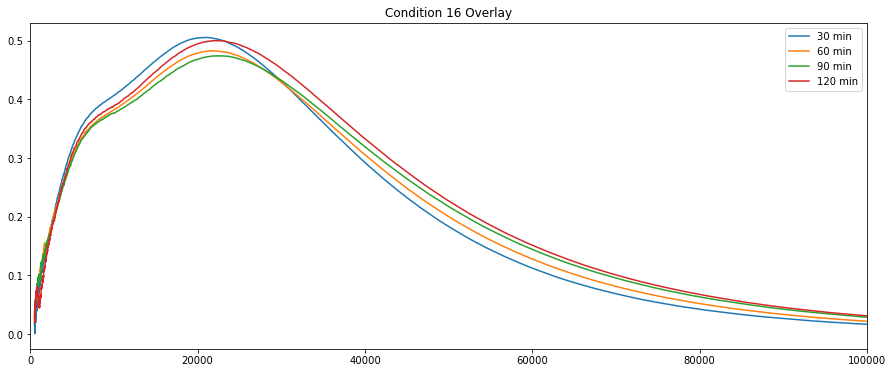

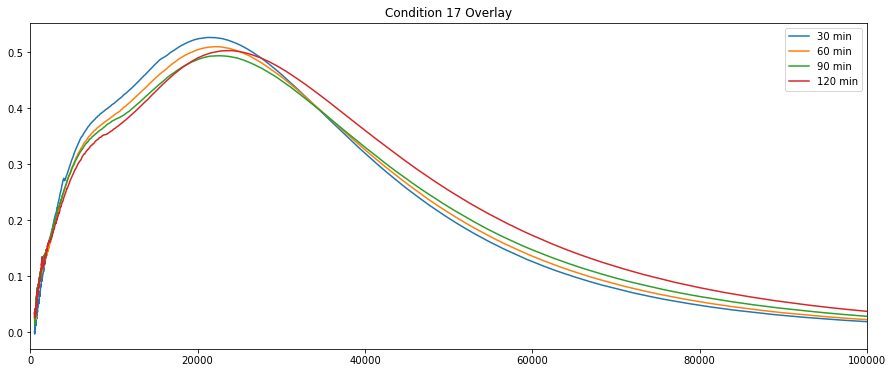

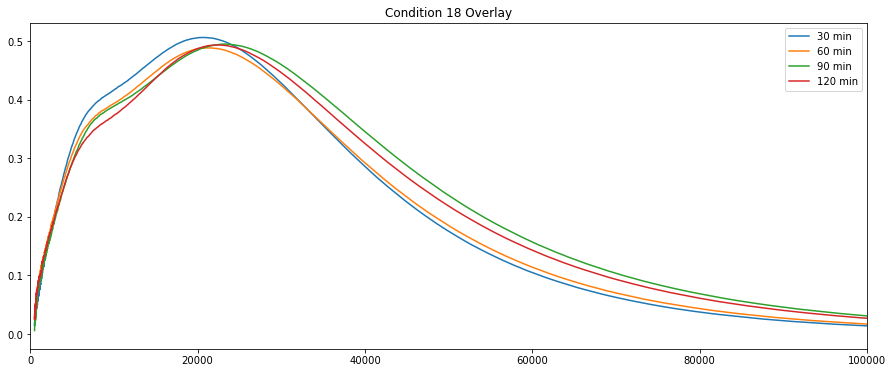

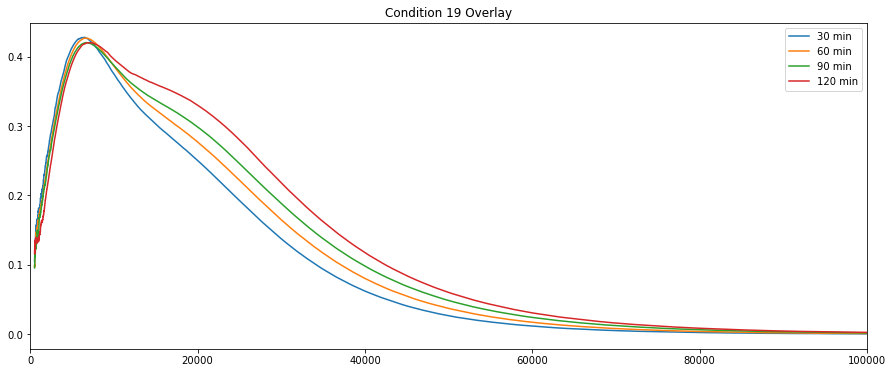

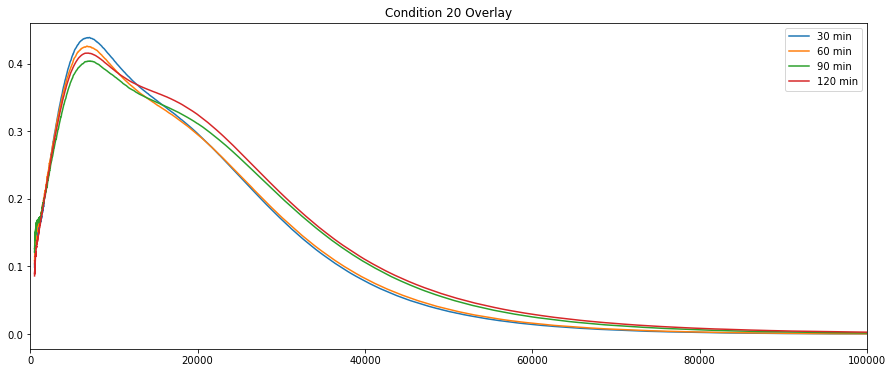

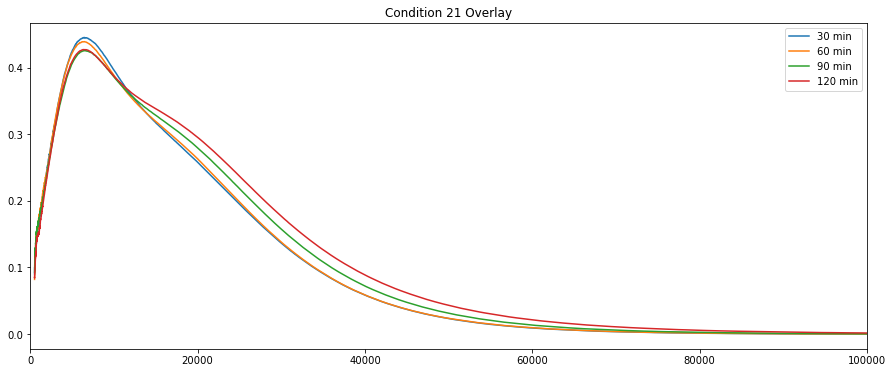

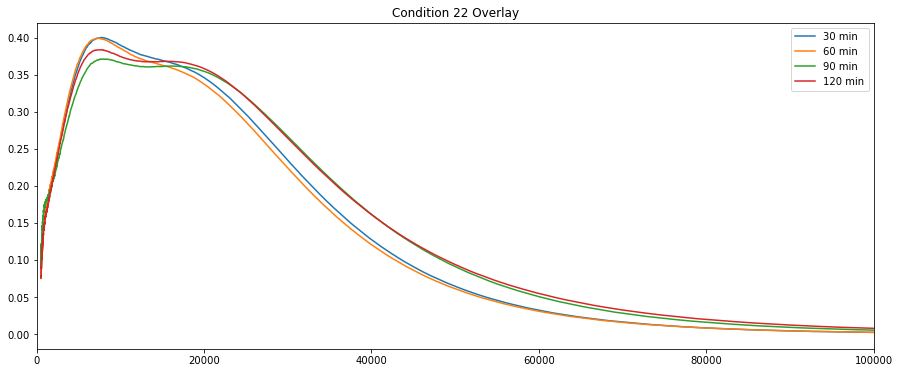

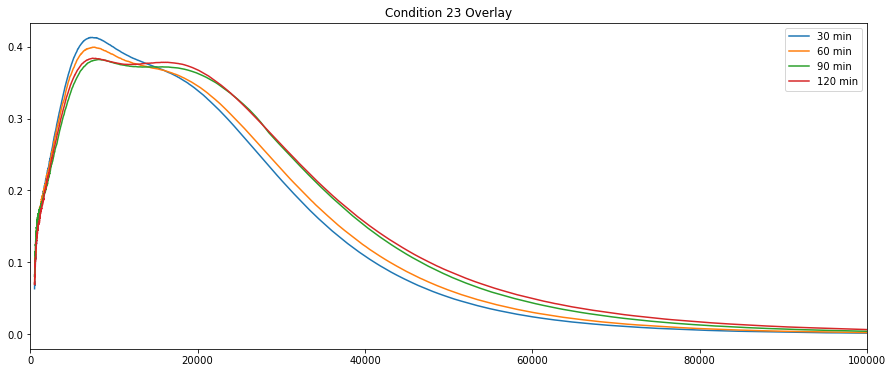

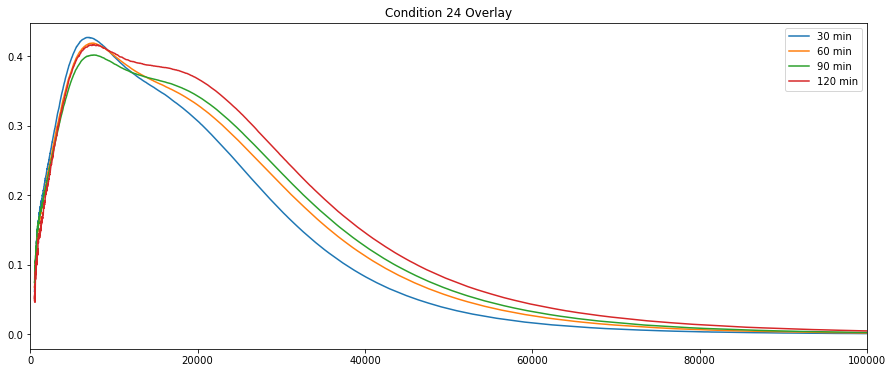

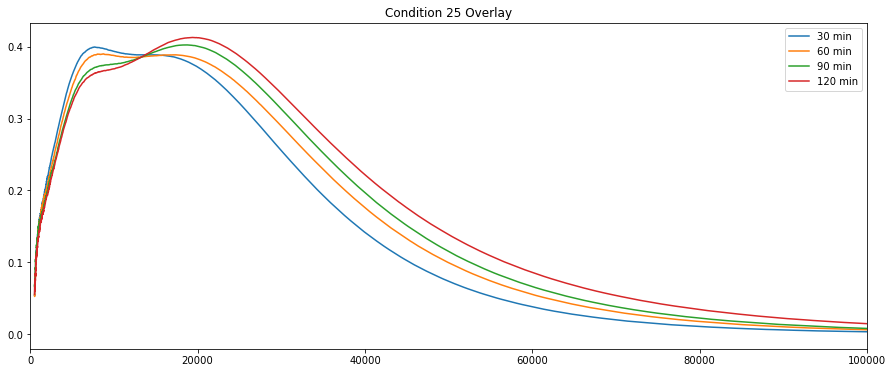

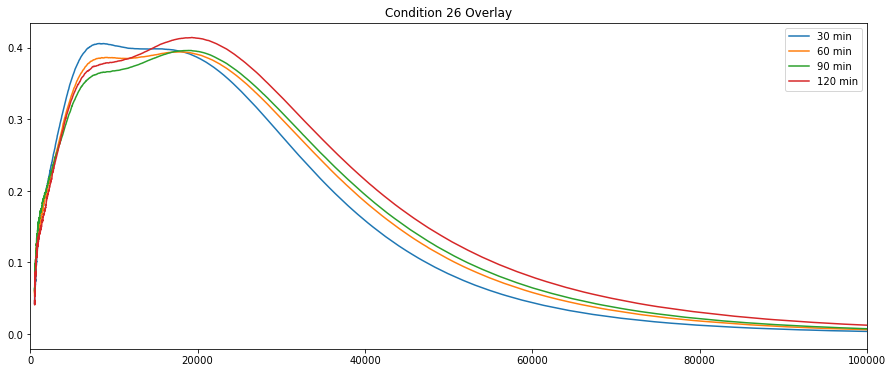

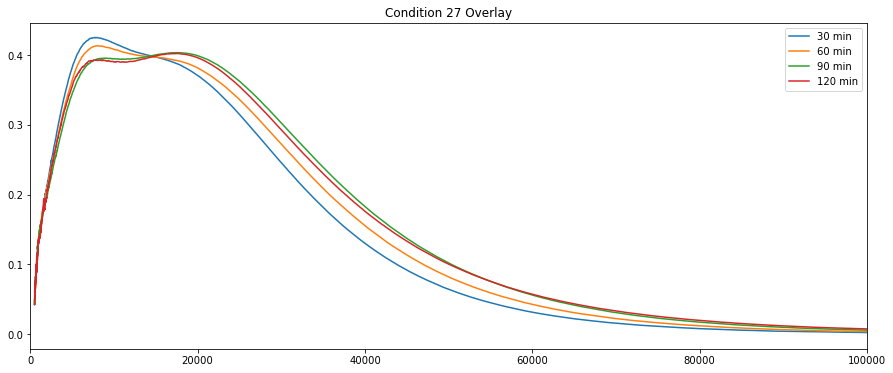

In [20]:
import numpy as np

l = np.arange(0,105,4) # Create a list which encodes the index location for every 4 rows.
l

for k,i in enumerate(l):
    
    df_dummy = df.iloc[i:i+4,:]
    x = df.T.index
    y1 = df.iloc[i,:]
    y2 = df.iloc[i+1,:]
    y3 = df.iloc[i+2,:]
    y4 = df.iloc[i+3,:]
    
    plt.figure(figsize=(15,6))
    plt.title('Condition ' + str(k+1)+ ' Overlay')
    plt.plot(x, y1, label='30 min')
    plt.plot(x, y2, label='60 min')
    plt.plot(x, y3, label='90 min')
    plt.plot(x, y4, label='120 min')
    plt.legend()
    plt.xlim(0,100000)
    plt.show()

In [7]:
df.to_excel(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\1. Data - Consolidated\GPC - Consolidated\Overall MWD Data.xlsx')
# Excel file inspected manually.